<img src="kickstarter_header.png">


Kickstarter è una piattaforma online di crowdfunding per progetti creativi nata nell'Aprile del 2019. Tramite esso sono state finanziate diveri tipi di opere, tra cui film, videogiochi, musica, fumetti ecc...

<center><font size=20><b> <font color='#87c442'>E</font>xploratory <font color='#87c442'>D</font>ata <font color='#87c442'>A</font>nalysis</b> </font></center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objs as go


## Dataset

Iniziamo descrivendo la struttura del dataset. Esso contiene le informazioni di più di 300.000 progetti ed è disponibile nel link https://www.kaggle.com/kemical/kickstarter-projects. Mostrando le prime righe:

In [2]:
original_data = pd.read_csv('ks-projects-201801.csv')
original_data = original_data.dropna()
original_data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


Viene fatto un piccolo preprocessing dei dati per ottenere un singolo valore per l'anno di lancio e un singolo valore per il mese di lancio, dopo aver fatto questo si possono eliminare le colonne *deadline* e *launched* perché ormai inutili. Successivamente viene creata una nuova feature "duration" per indicare la durata (in giorni) del progetto. Infine verra tolta la colonna *ID* in quanto, se necessario, verrà usato l'ID creato da Pandas.

In [3]:
data = original_data.copy()
data['launch_year'] = pd.to_datetime(original_data['launched'], format="%Y/%m/%d").dt.year
data['launch_month'] = pd.to_datetime(original_data['launched'], format="%Y/%m/%d").dt.month
data['duration'] = (pd.to_datetime(data['deadline'], format="%Y/%m/%d") - pd.to_datetime(data['launched'], format="%Y/%m/%d")).dt.days
data = data.drop(['ID','launched','deadline'],1)
data.head()

,name,category,main_category,currency,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launch_year,launch_month,duration
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,1000.0,0.0,failed,0,GB,0.0,0.0,1533.95,2015,8,58
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,30000.0,2421.0,failed,15,US,100.0,2421.0,30000.00,2017,9,59
2,Where is Hank?,Narrative Film,Film & Video,USD,45000.0,220.0,failed,3,US,220.0,220.0,45000.00,2013,1,44
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,5000.0,1.0,failed,1,US,1.0,1.0,5000.00,2012,3,29
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,19500.0,1283.0,canceled,14,US,1283.0,1283.0,19500.00,2015,7,55


Si può notare che i campi sono 15, rispettivamente:
> 
>* Id univoco 
2. Nome del progetto
3. Categoria a cui appartiene il progetto 
4. Sottocategoria
5. Valuta usata dal progetto
6. Scadenza della raccolta fondi
7. Obiettivo 
8. Data di lancio
9. Soldi raccolti
10. Stato del progetto che può essere fallito, sospeso, riuscito o cancellato
11. Numero dei backers (sostenitori del progetto)
12. Nazione 
13. Conversione in dollari americani dei soldi raccolti fatta da Kickcstarter
14. Conversione in dollari americani dei soldi raccolti fatta tramite https://fixer.io/
15. Conversione in dollari americani dell'obiettivo fatta tramite https://fixer.io/

****

## Analisi quantitativa

In questa sezione si analizzerà la numerosità dei progetti.

In [4]:
def create_barplot(title, x, y, pal, rotate):
    sns.set(font_scale=2.5)
    plt.figure(figsize=(40,20))
    plt.title(title, fontsize=50, fontname='sans serif')
    g = sns.barplot(x, y, palette=pal )
    if rotate: 
        g.set_xticklabels(g.get_xticklabels(),rotation=55, ha='right');

In [5]:
proj_per_category = data.main_category.value_counts().sort_values(ascending=False)
proj_per_subcategory = data.category.value_counts().sort_values(ascending=False)[0:15]

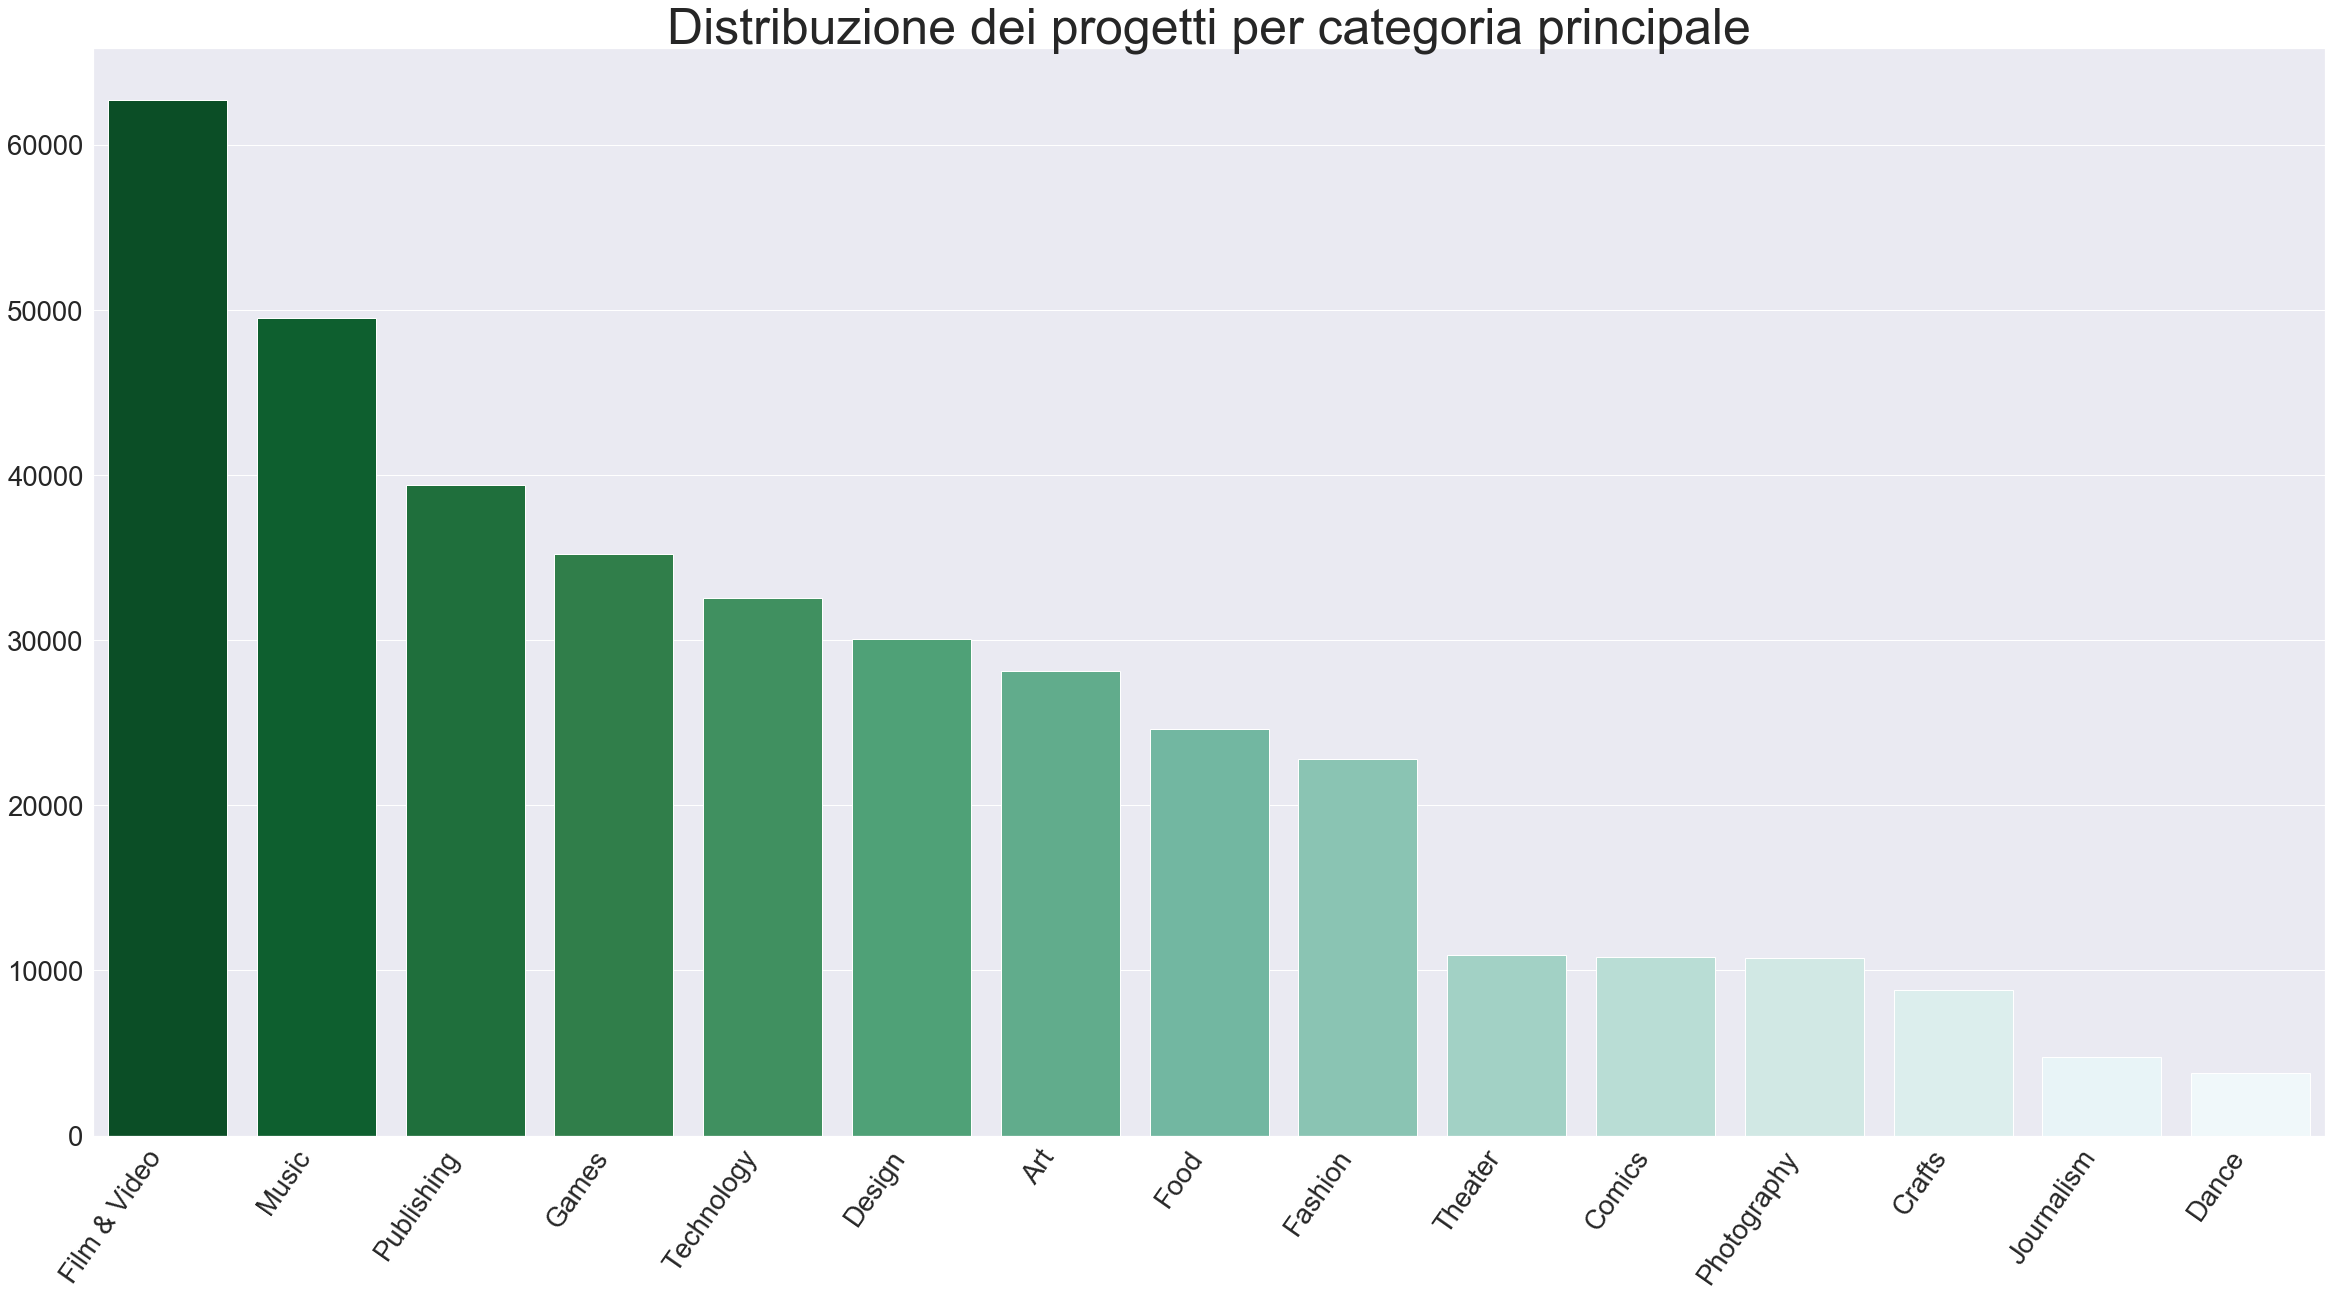

In [6]:
create_barplot("Distribuzione dei progetti per categoria principale", proj_per_category.index, proj_per_category.values, 
               sns.color_palette("BuGn_r",15), rotate=True)

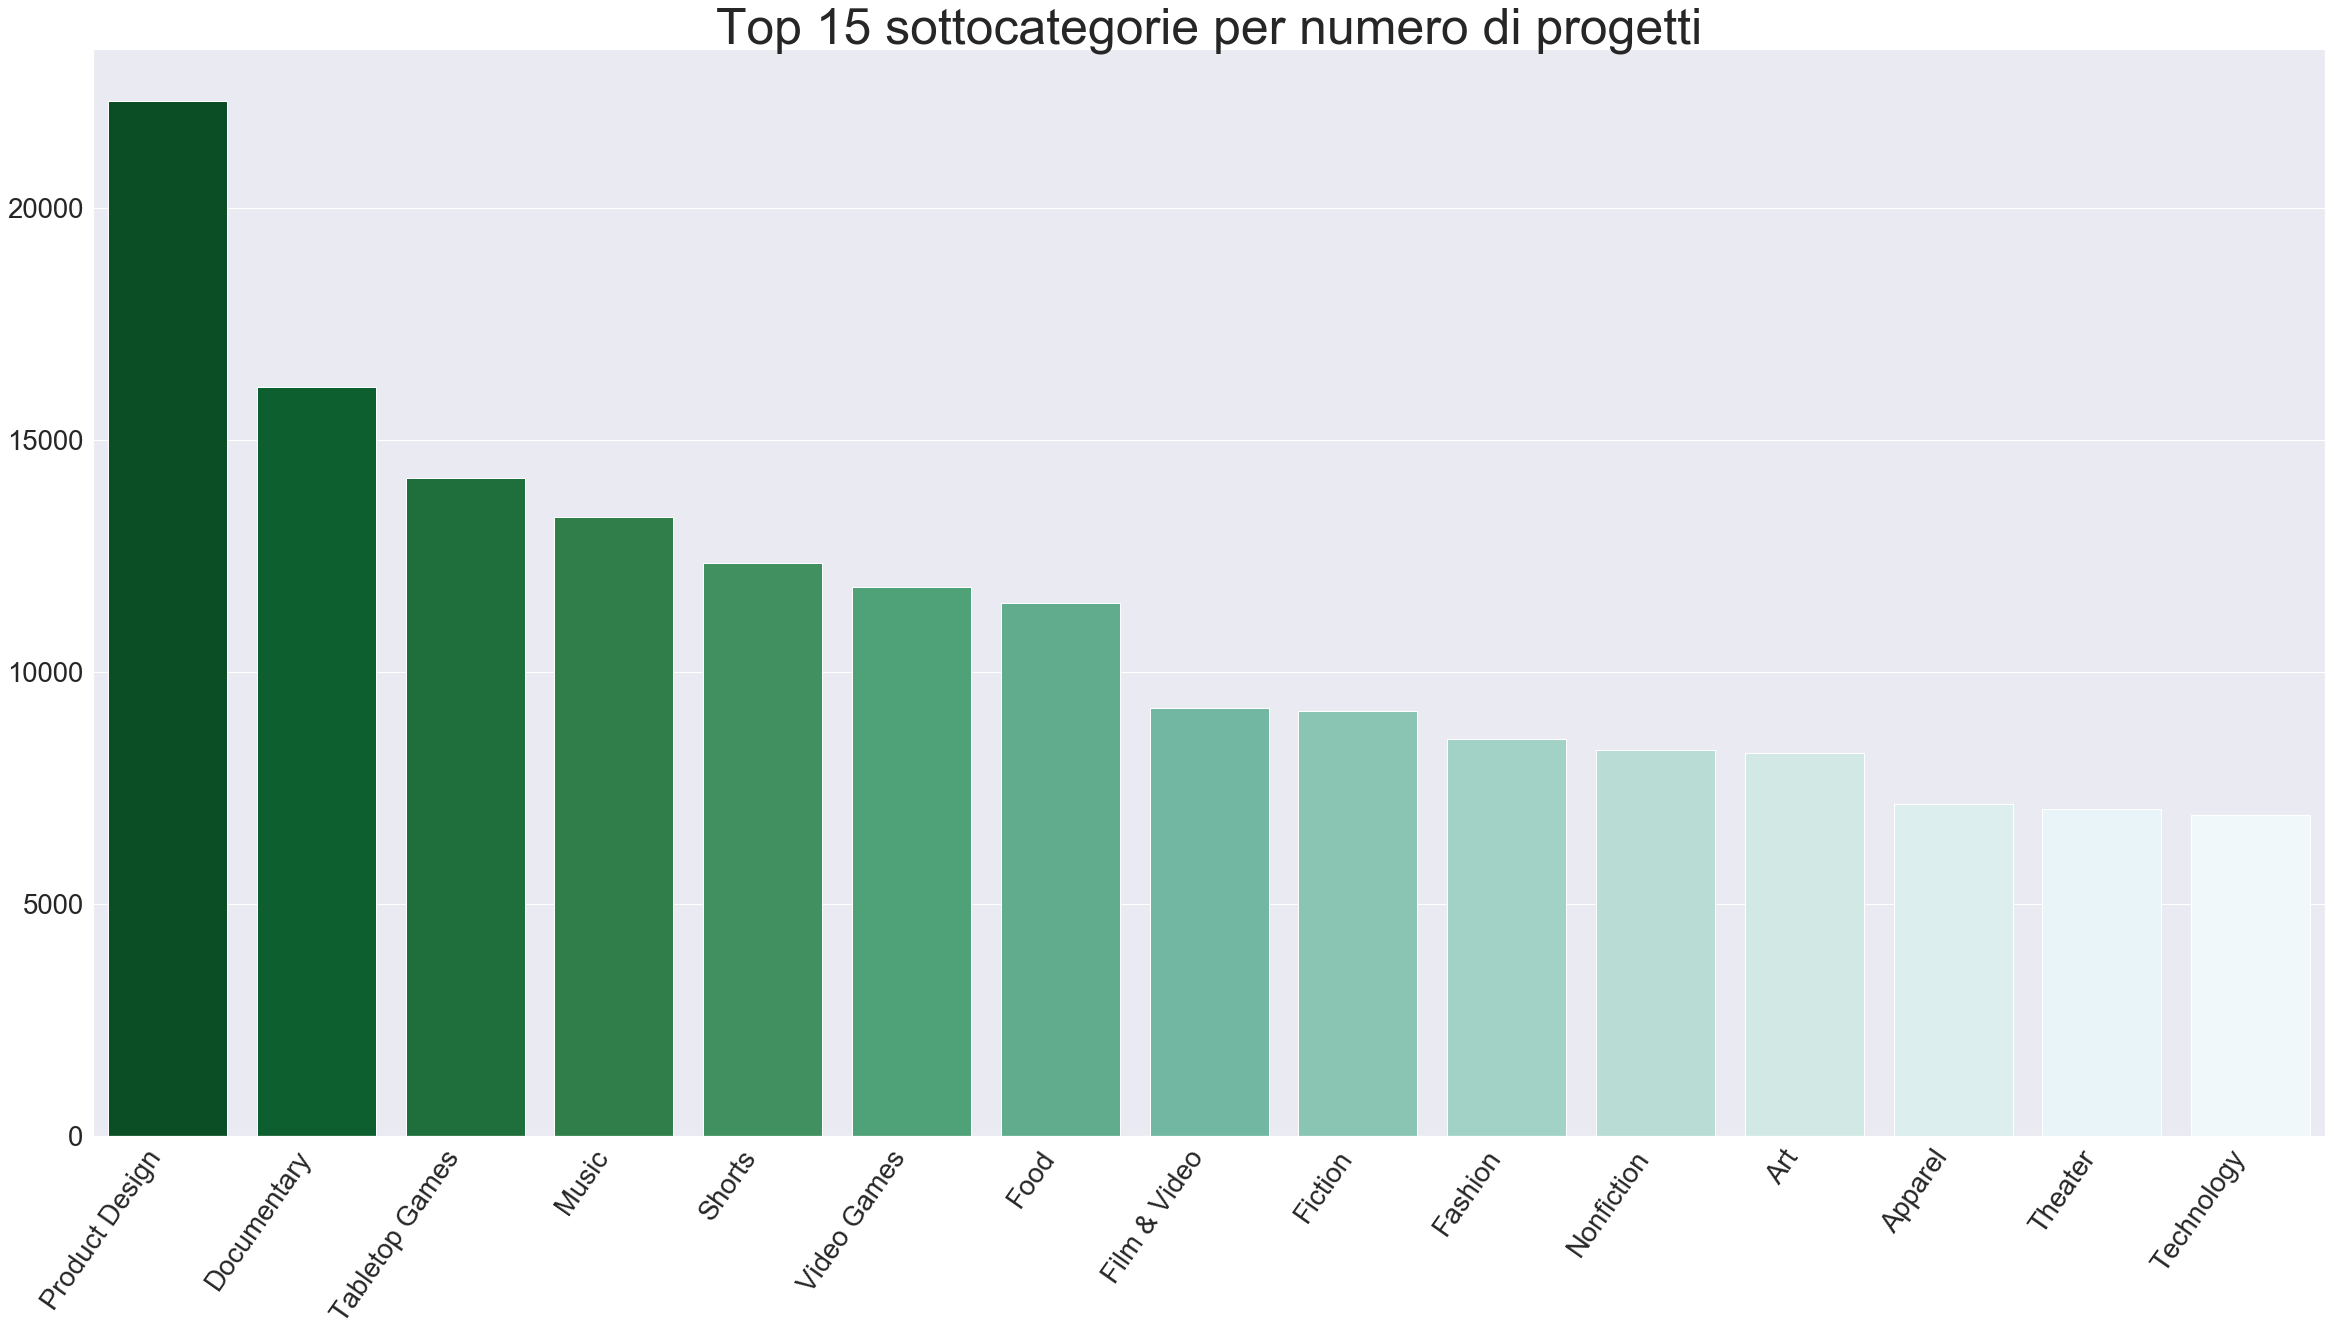

In [7]:
create_barplot("Top 15 sottocategorie per numero di progetti", 
               proj_per_subcategory.index, proj_per_subcategory.values, 
               sns.color_palette("BuGn_r",15), rotate=True)

Come si può vedere dai precedenti grafici a barre, le categorie principali sono 15 e la categoria con il maggior numero di progetti è *Film & Video*. Le sottocategorie sono tantissime e il grafico mostra le prime 15 con più progetti e la categoria più numerosa è *Product Design*. Il seguente grafico a barre mostra che il numero dei progetti lanciati degli anni è aumentato fino al 2015 per poi decrescere di nuovo. 

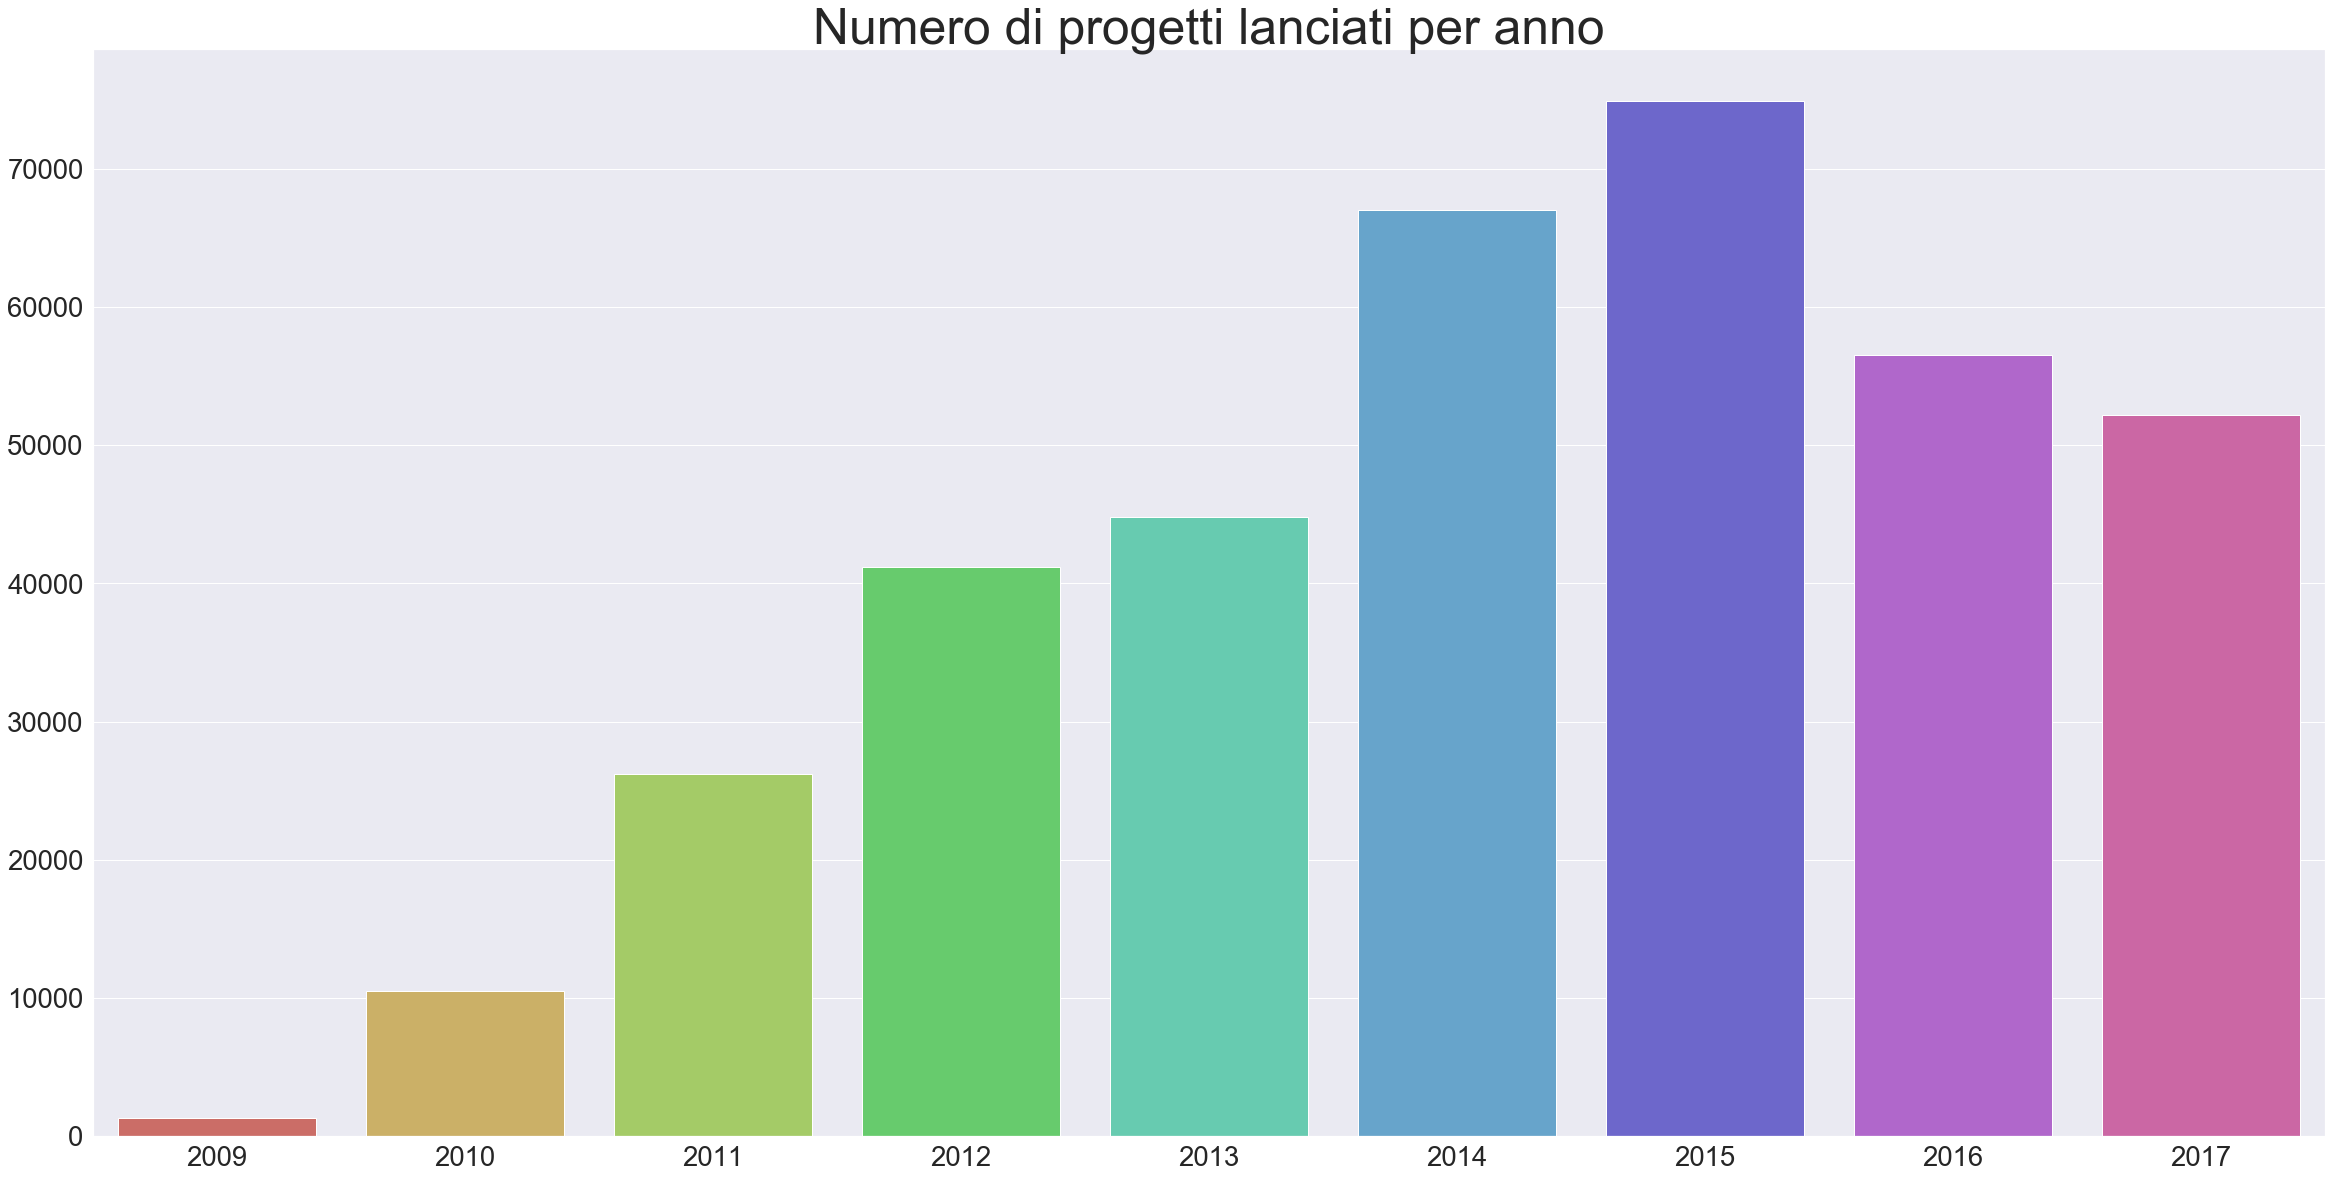

In [8]:
prj_per_year = data.launch_year.value_counts().sort_values(ascending=False)
prj_per_year = prj_per_year.drop([1970,2018], axis=0)

create_barplot("Numero di progetti lanciati per anno",
               prj_per_year.index, prj_per_year.values, 
               sns.color_palette("hls",n_colors=9), rotate=False)

Il seguente grafico invece ci mostra la distribuzione del lancio dei progetti nei mesi, si può notare che non c'è tanta differenza tranne per Gennaio, Febbraio e Dicembre che sono quelli meno scelti per il lancio.


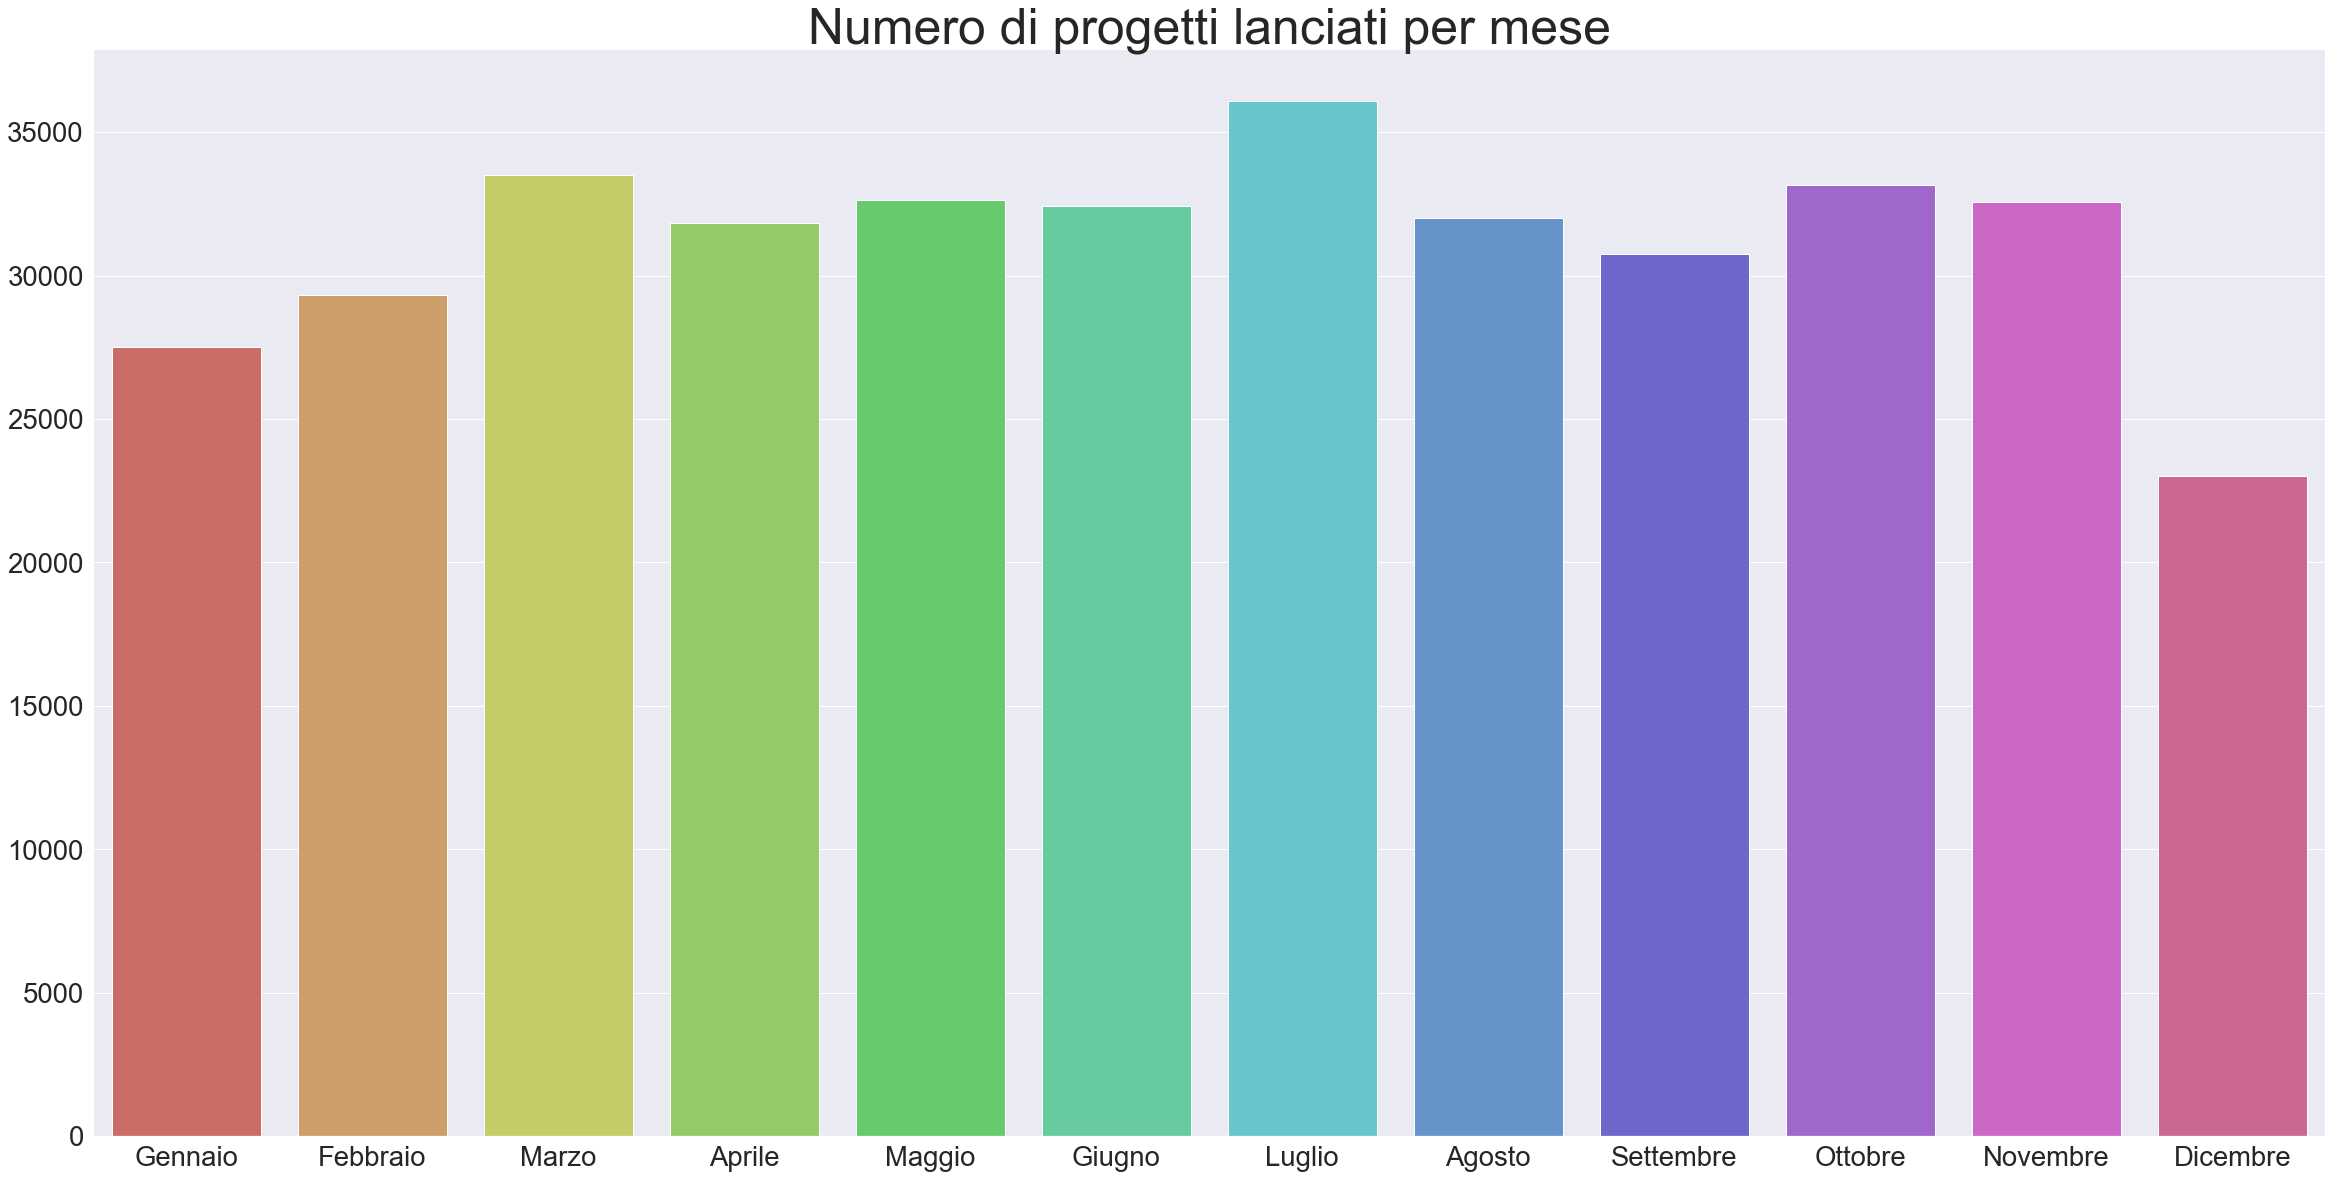

In [9]:
prj_per_month = data.launch_month.value_counts().sort_index()
prj_per_month = prj_per_month.rename(index={1:'Gennaio', 2:'Febbraio', 3:'Marzo', 4:'Aprile', 5:'Maggio', 6:'Giugno', 
                                           7:'Luglio', 8:'Agosto', 9:'Settembre', 10:'Ottobre', 11:'Novembre', 12:'Dicembre'})
create_barplot("Numero di progetti lanciati per mese",
               prj_per_month.index, prj_per_month.values, 
               sns.color_palette("hls",n_colors=12), rotate=False)

Il seguente grafico non ci dice molto in quanto quasi la totalità dei progetti lanciati sono stati lanciati negli Stati Uniti.

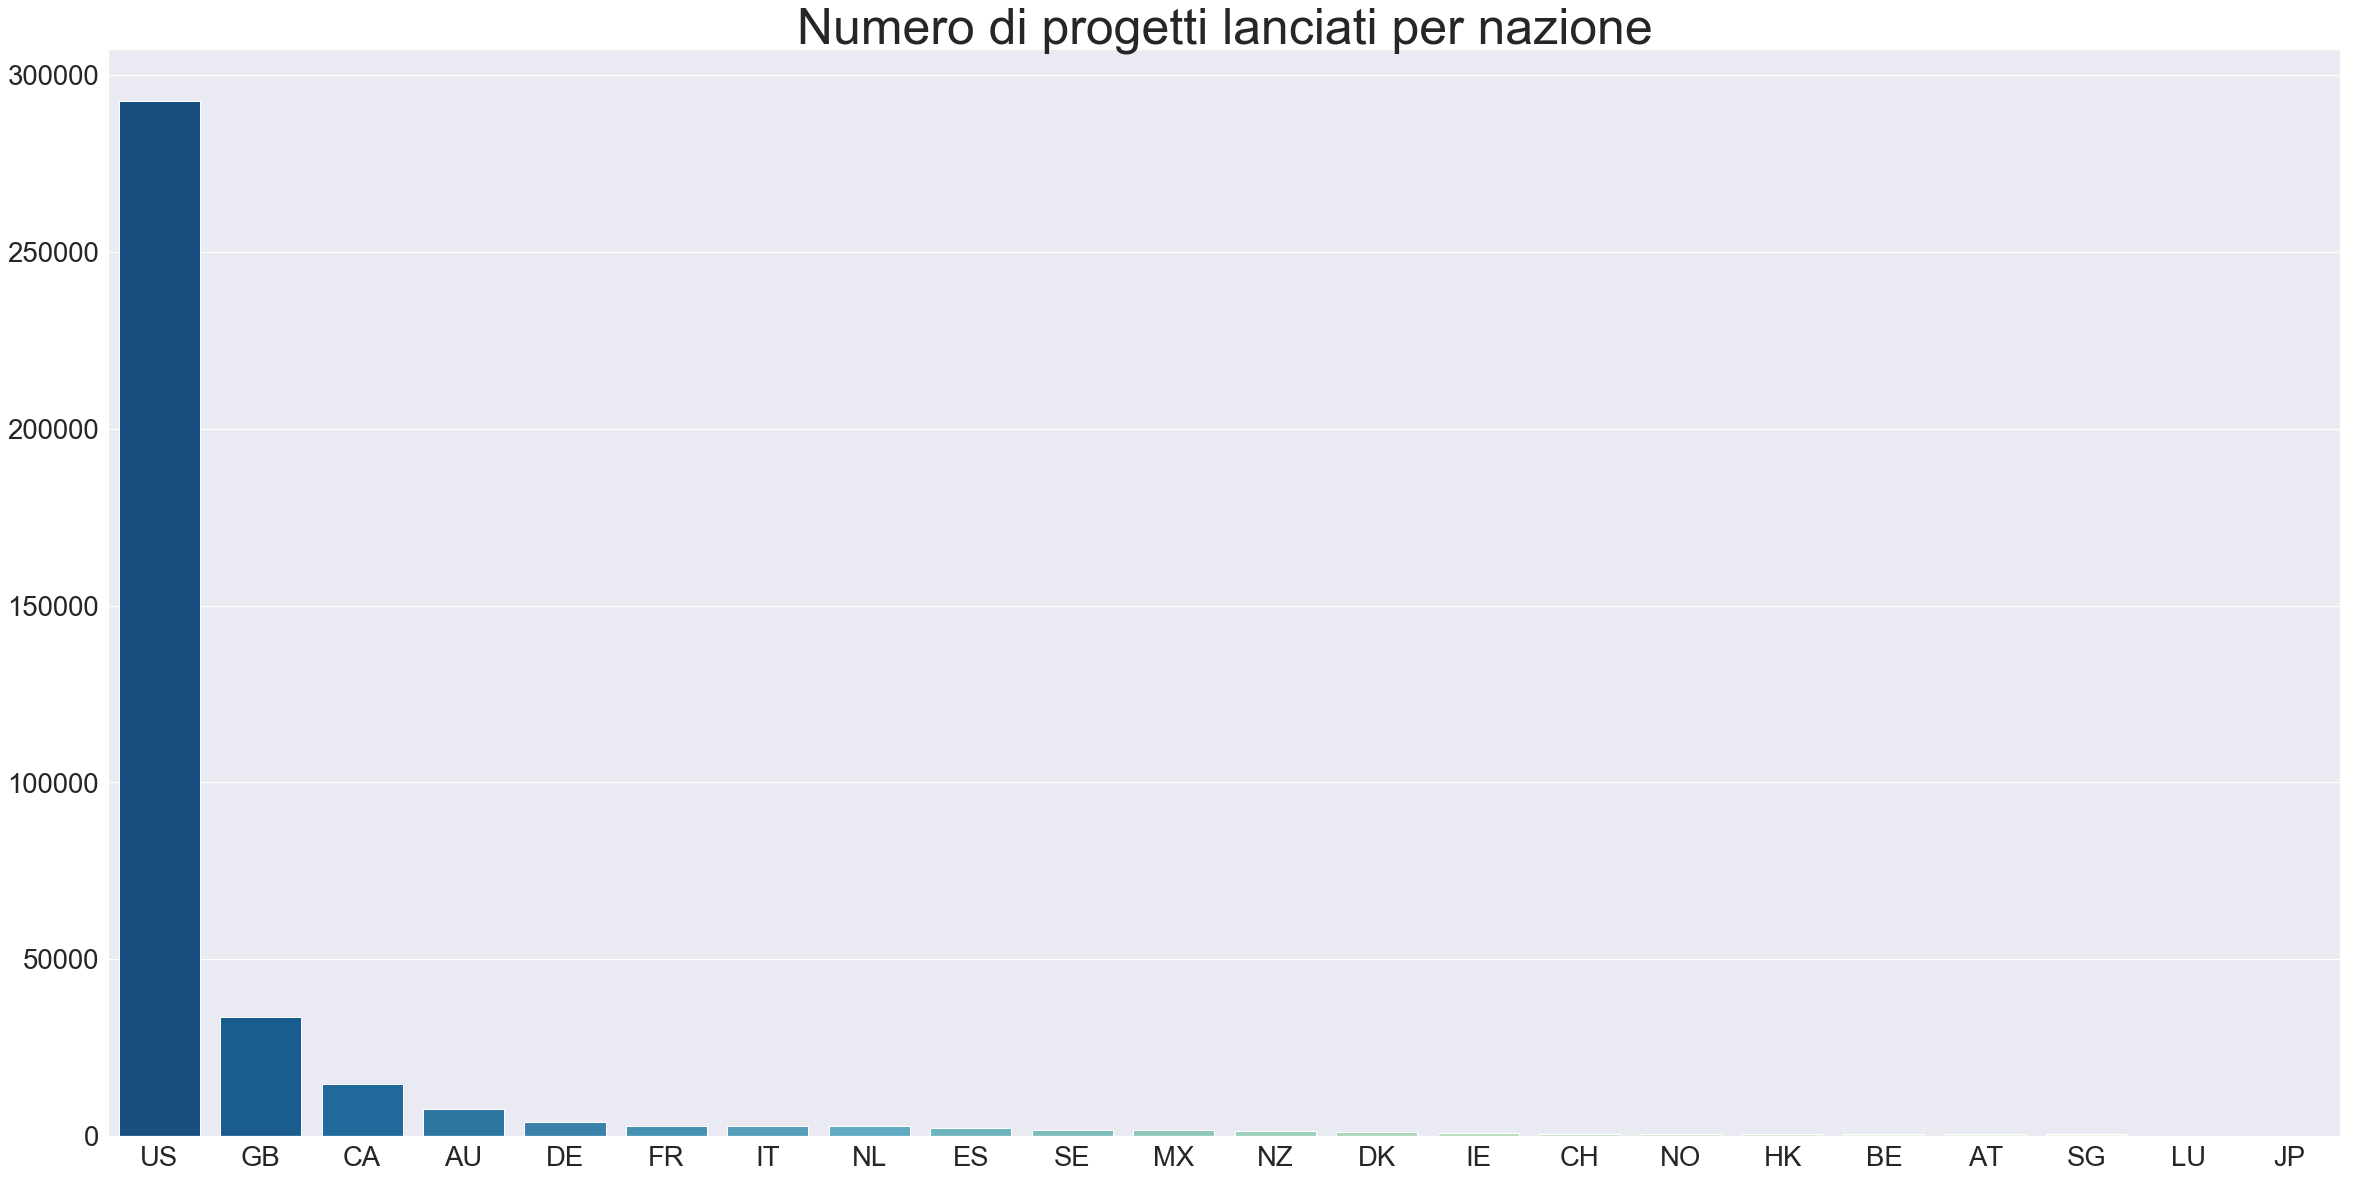

In [10]:
prj_per_country = data.country.value_counts().sort_values(ascending=False)

create_barplot("Numero di progetti lanciati per nazione",
               prj_per_country.index, prj_per_country.values, 
               sns.color_palette("GnBu_r", 20), rotate=False)

*****

## Analisi monetaria

Analizzando i dati descrittivi dei soldi raccolti (in qualsiasi stato) si può notare che il range è molto grande ed è difficile analizzare la distribuzione che essi hanno. Qui di seguito sono mostrati i principali indicatori statistici.

In [11]:
data["usd pledged"].describe().apply(lambda x: format(x, 'f'))

count      374860.000000
mean         7036.802252
std         78640.161667
min             0.000000
25%            16.980000
50%           394.765000
75%          3034.425000
max      20338986.270000
Name: usd pledged, dtype: object

Per visualizzare meglio la distribuzione, potrebbe essere utile trasformarli applicando la *log-trasformation*, il boxplot nella prossima immagine mostra i dati dopo la trasformazione e mette a confronto la distribuzione dei soldi raccolti con quella dei goal.

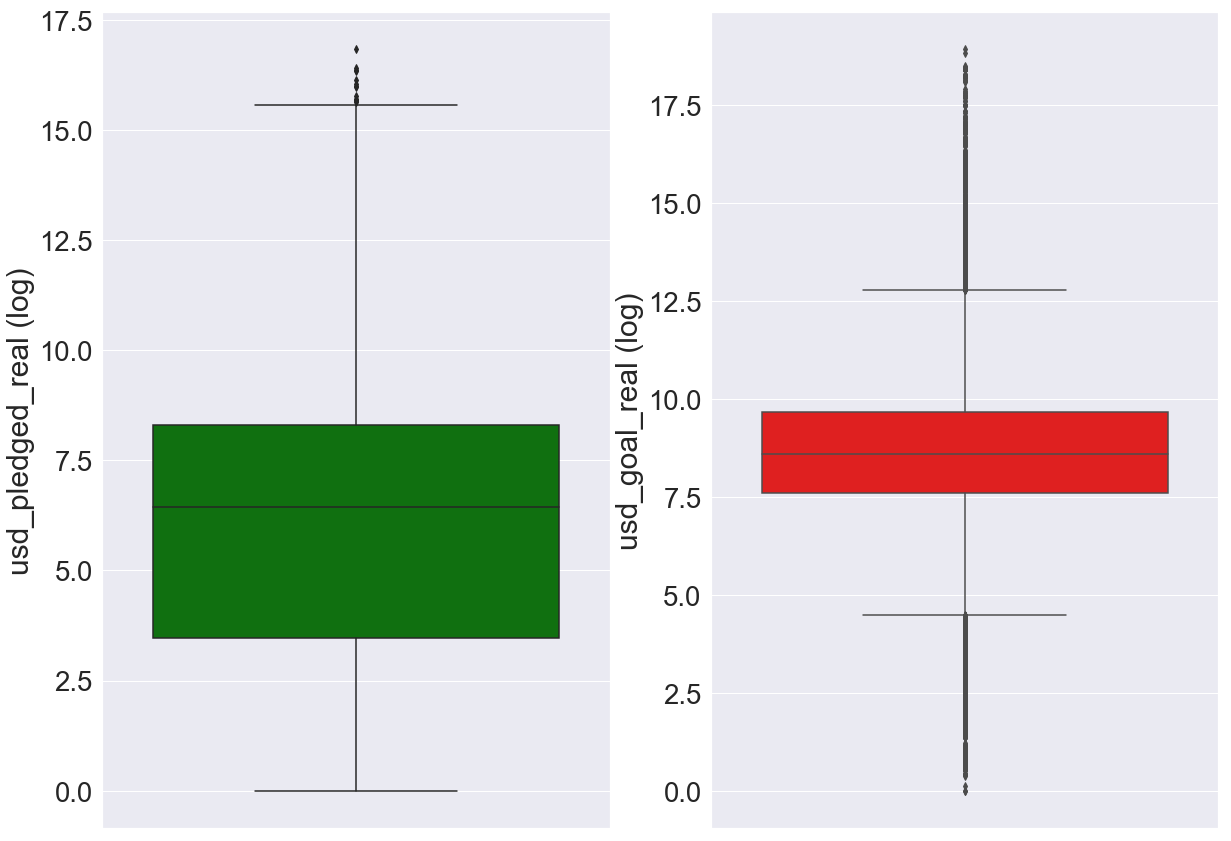

In [12]:
data_log = data.copy()
data_log.head()
data_log['usd_pledged_real (log)'] =  data_log['usd_pledged_real'].apply(lambda x: np.log(x + 1))
data_log['usd_goal_real (log)'] =  data_log['usd_goal_real'].apply(lambda x: np.log(x + 1)) 
plt.figure(figsize=(20,15))
plt.title("Distribuzione dei soldi raccolti dopo la trasformata log", fontsize=20, fontname='sans serif')
plt.subplot(1, 2, 1)
sns.boxplot(y=data_log['usd_pledged_real (log)'], color='green');
plt.subplot(1, 2, 2)
sns.boxplot(y=data_log['usd_goal_real (log)'], color='red');

Ovviamente la distribuzione di **usd pledged real** ha la maggior parte dei campioni minori della maggior parte dei valori di **usd_goal_real**. Alcuni campioni di usd pledged real si distanziano di molto dalla media in quanto sono quei progetti di successo che dopo aver superato il goal continuano a raccogliere soldi e superano di gran lunga l'obiettivo da essi fissato. Si possono analizzare anche le distribuzioni dei soldi raccolti e goal all'interno di ogni categoria principale e si può notare che le distribuzioni dei goal delle varie categorie non è così diverso (variano solo le medie), invece cambiano di molto la forma delle distribuzioni dei soldi raccolti.

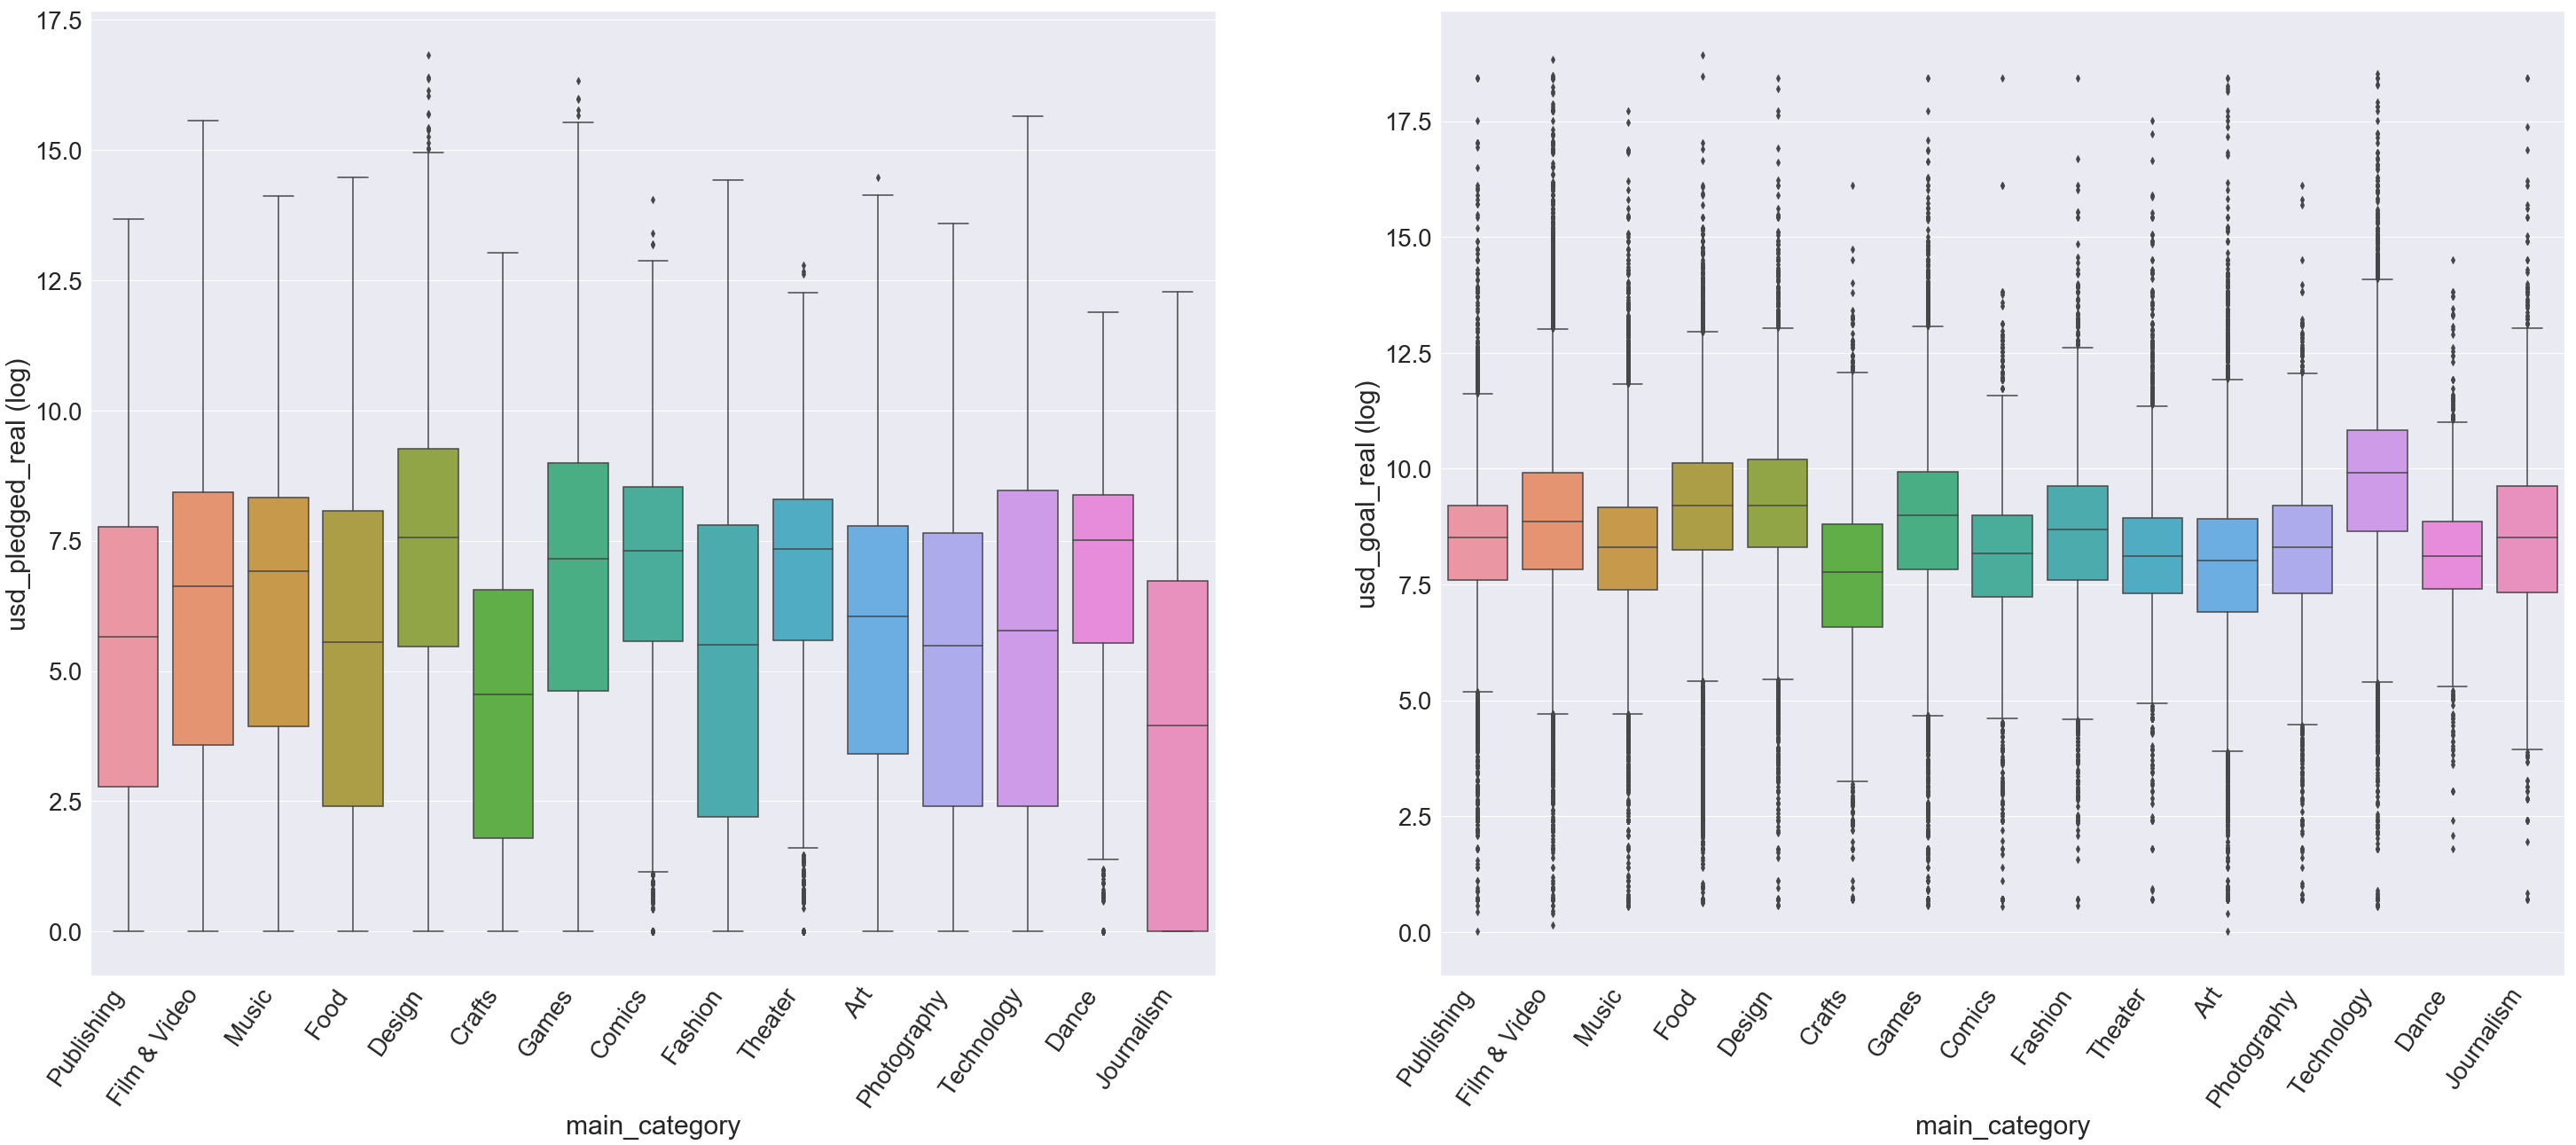

In [13]:
plt.figure(figsize=(50,20))
plt.title("Distribuzione dei soldi raccolti dopo la trasformata log", fontsize=50, fontname='sans serif')
plt.subplot(1, 2, 1)
g = sns.boxplot(y=data_log['usd_pledged_real (log)'], x=data_log['main_category']);
g.set_xticklabels(g.get_xticklabels(),rotation=55, ha='right');
plt.subplot(1, 2, 2)
g = sns.boxplot(y=data_log['usd_goal_real (log)'], x=data_log['main_category']);
g.set_xticklabels(g.get_xticklabels(),rotation=55, ha='right');

Possiamo visualizzare il progetto di maggior successo nella storia.

In [14]:
data[data['usd_pledged_real'] == max(data['usd_pledged_real'])]

,name,category,main_category,currency,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launch_year,launch_month,duration
157270,"Pebble Time - Awesome Smartwatch, No Compromises",Product Design,Design,USD,500000.0,20338986.27,successful,78471,US,20338986.27,20338986.27,500000.0,2015,2,31


<img src="kick_max.png">

Infine visualizziamo i soldi raccolti negli anni, la media negli anni non cambia molto (c'è un lieve incremento dal 2009 al 2013) ma dopo il 2013 cambia la forma della distribuzione.

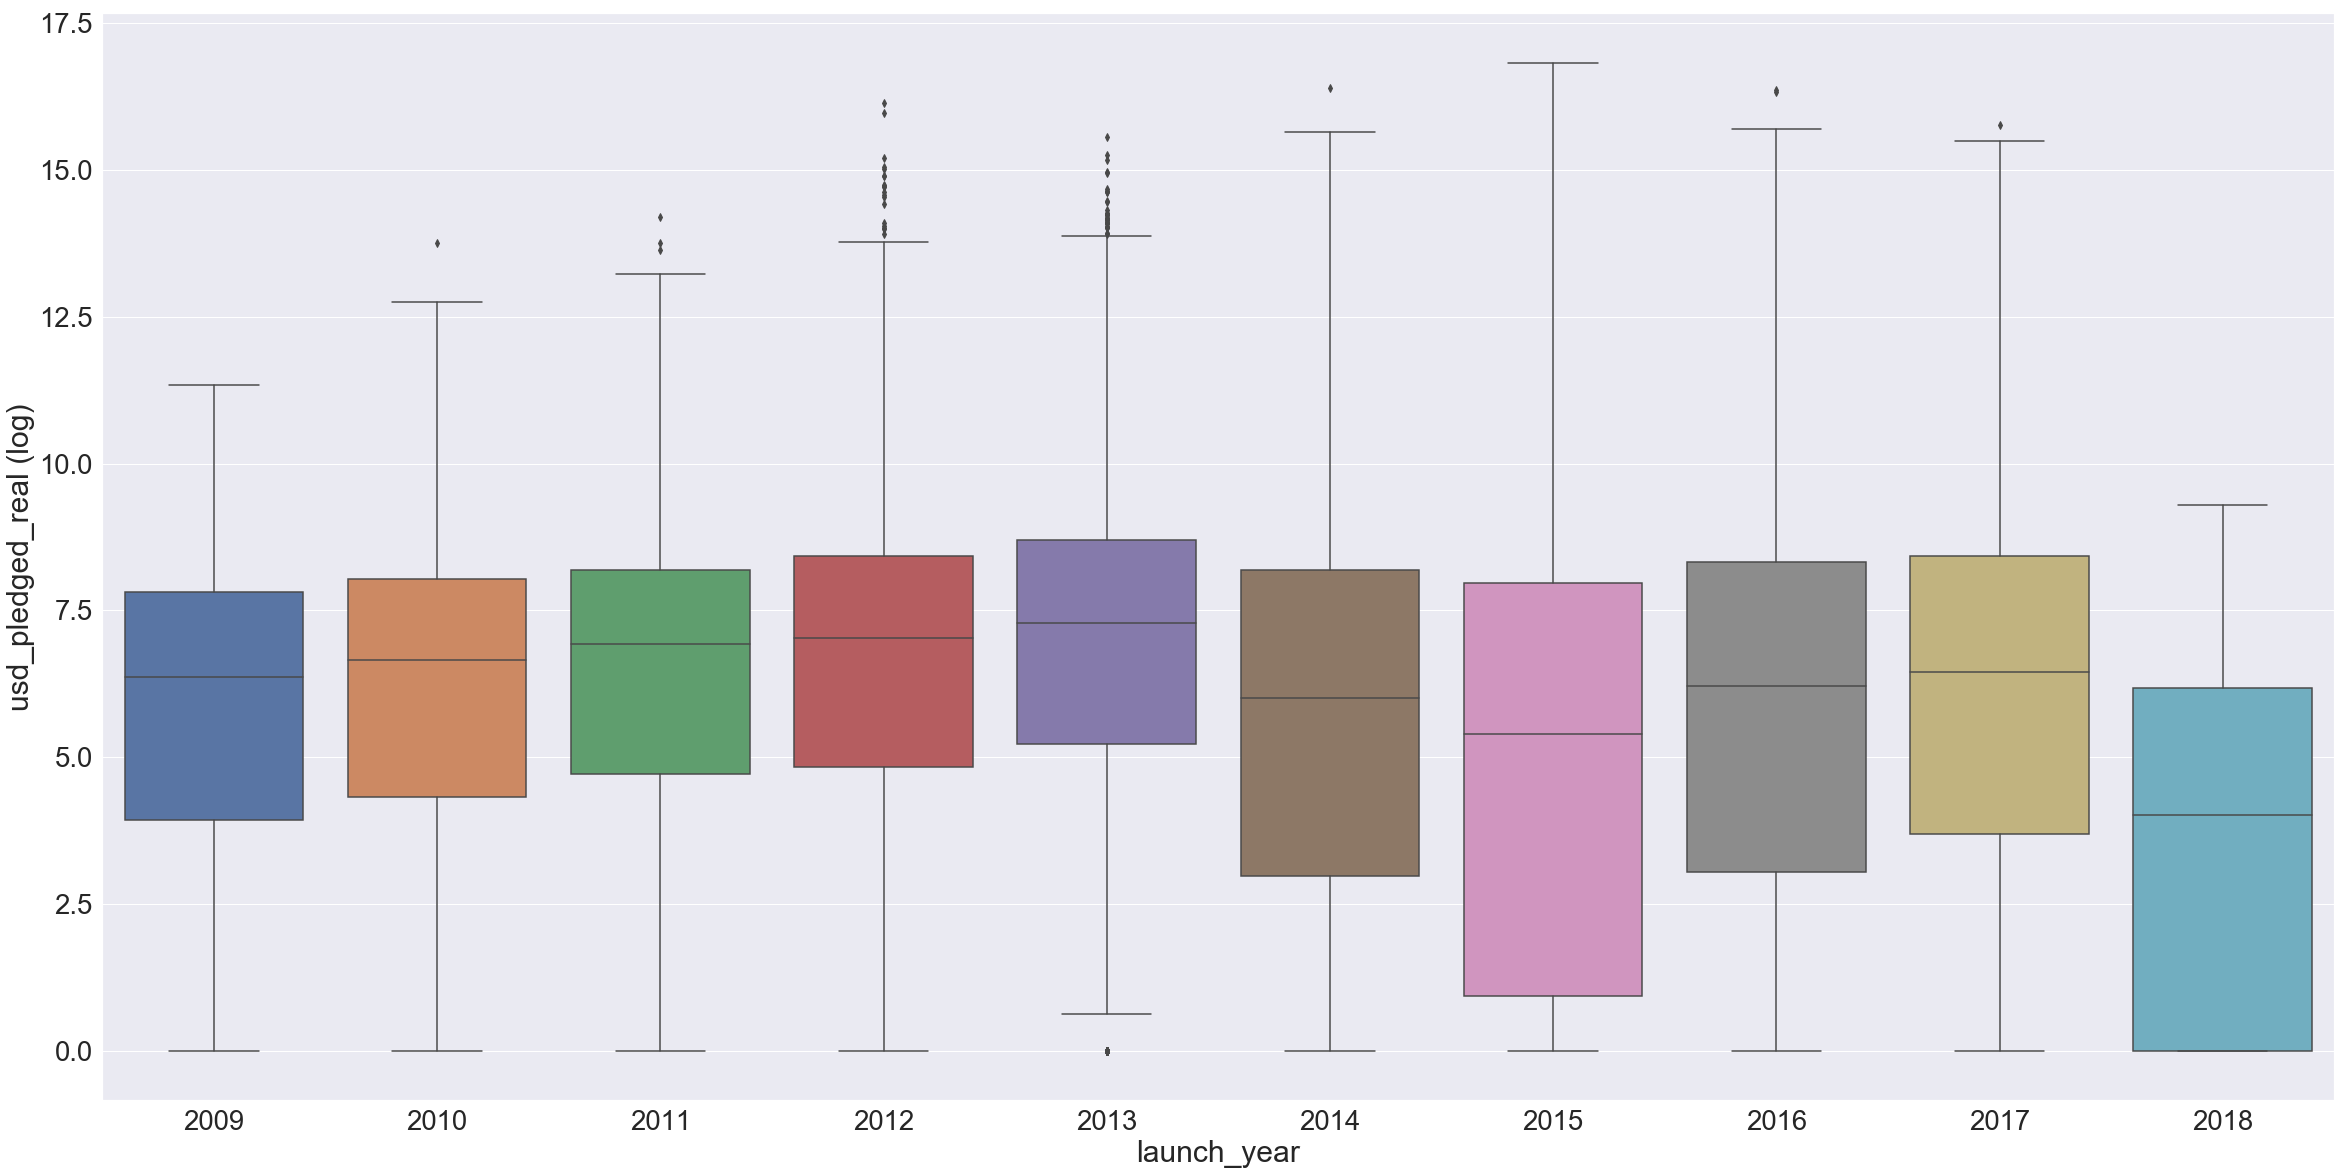

In [15]:
plt.figure(figsize=(40,20))
g = sns.boxplot(y=data_log['usd_pledged_real (log)'], x=data_log[data['launch_year'] != 1970]['launch_year']);

***

## Analisi del successo

Dopo aver analizzato il fattore monetario dei progetti, si passerà ad analizzare un altro fattore fondamentale di ogni progetto ovvero il successo.

failed        52.715947
successful    35.706931
canceled      10.339060
live           0.746412
suspended      0.491650
Name: state, dtype: float64

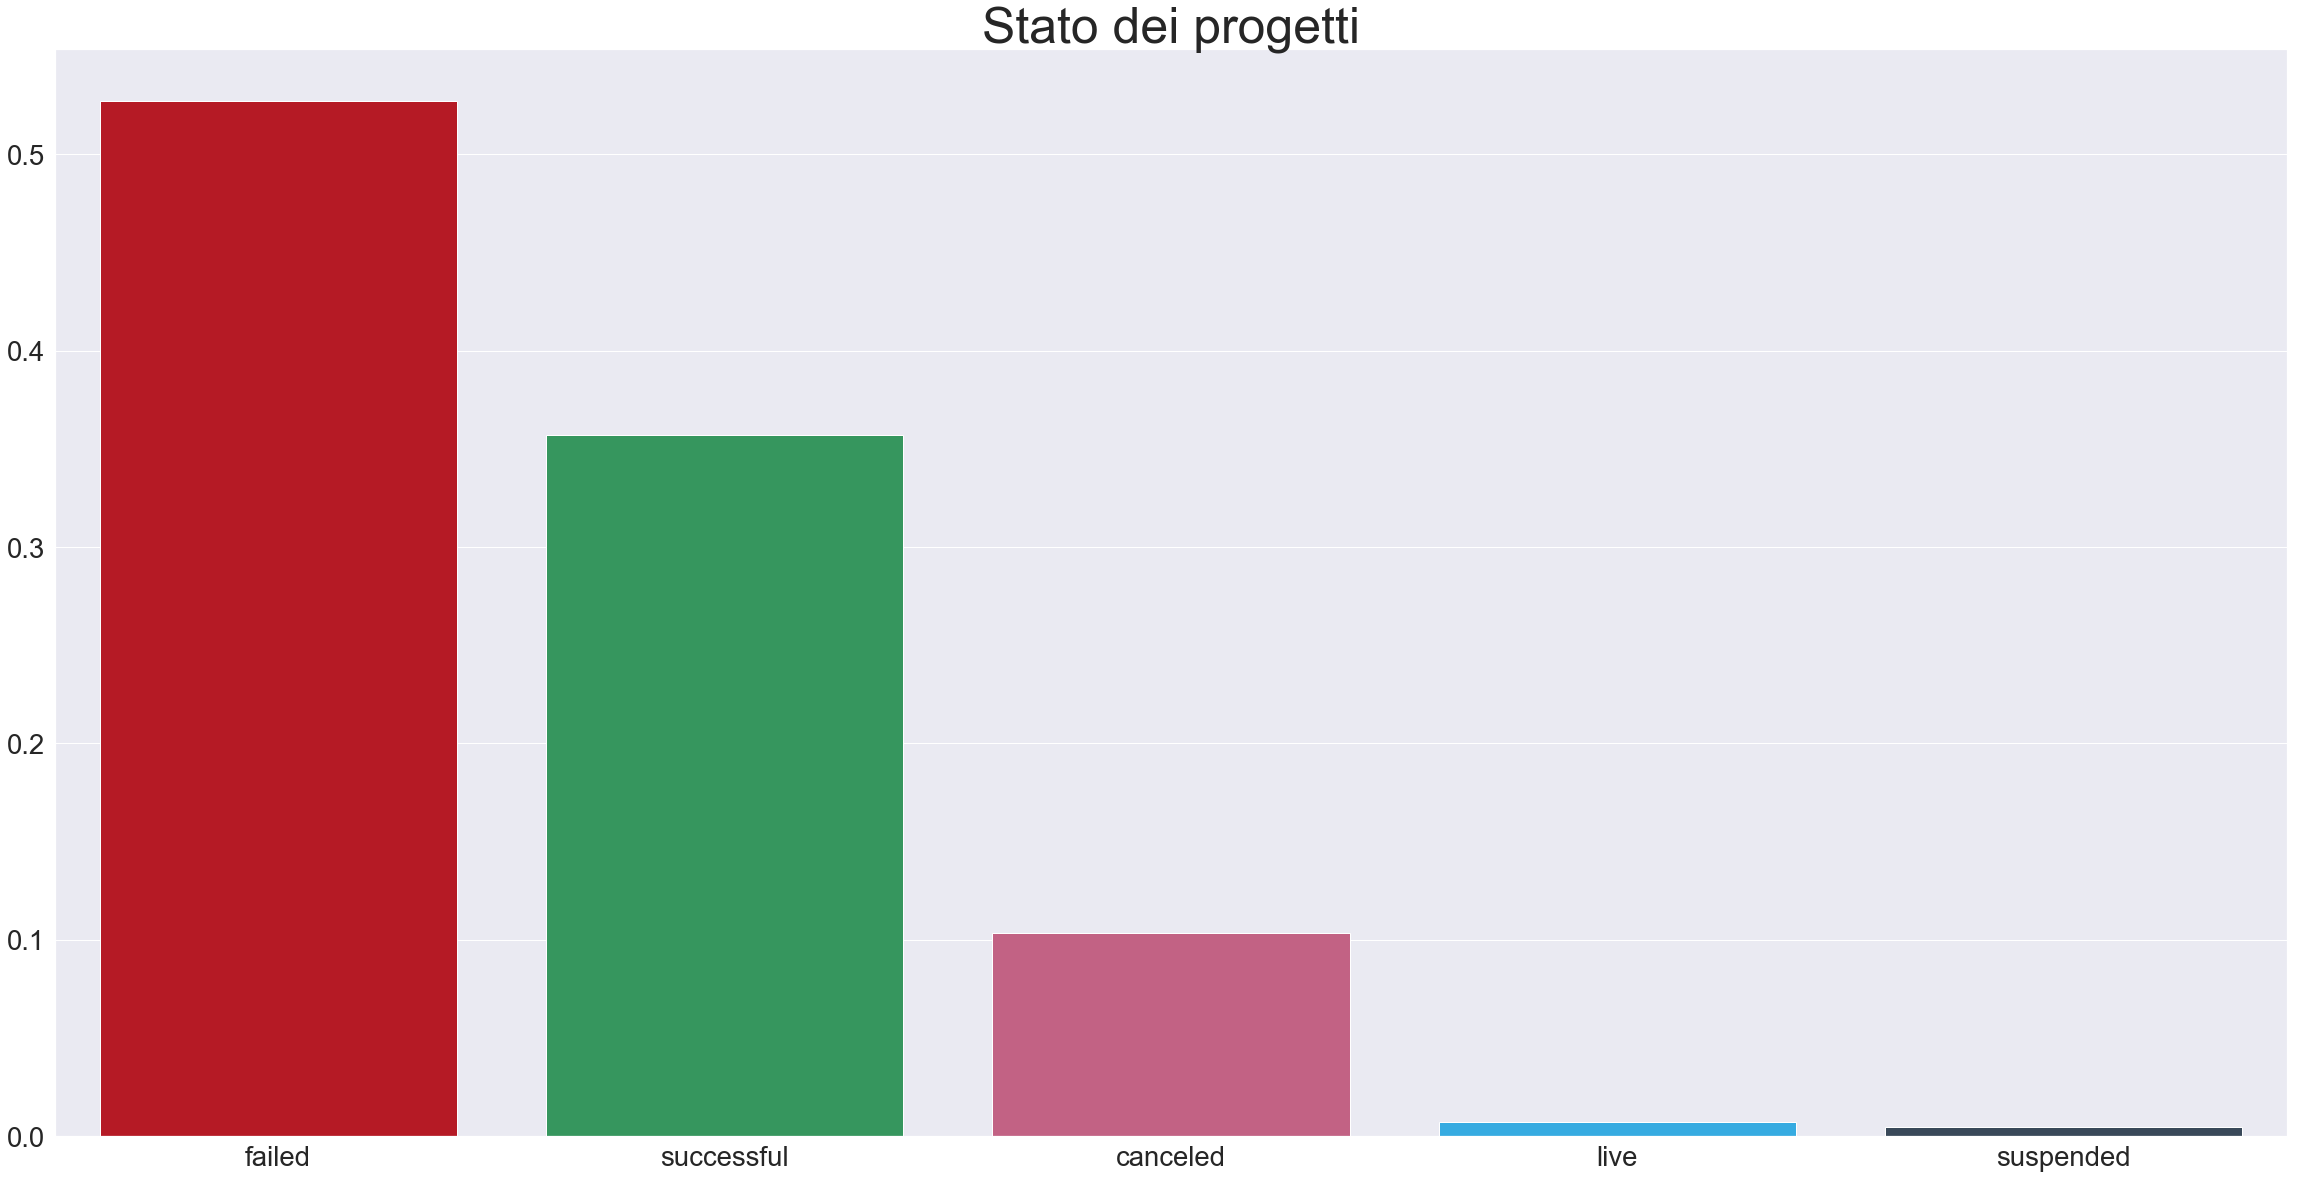

In [16]:
proj_per_state = data.state.value_counts(normalize=True)
colors = ["#cf000f", "#26a65b", "#d2527f", "#19b5fe", "#34495e"]
sns.set_palette(colors)
create_barplot("Stato dei progetti",
               proj_per_state.index, proj_per_state.values, 
               sns.color_palette(), rotate=False)
proj_per_state.apply(lambda x:x*100)


La percentuale dei progetti che vanno male è abbastanza elevata, il 52% dei progetti fallisce e il 10% viene cancellato. Ora si passerà ad analizzare la distribuzione dei progetti falliti e riusciti rispetto alla categoria di appartenenza. È interessante scoprire quale sono le categorie con la migliore precentuale di successo, questo potrebbe essere un fattore decisivo nella riuscita di un progetto.

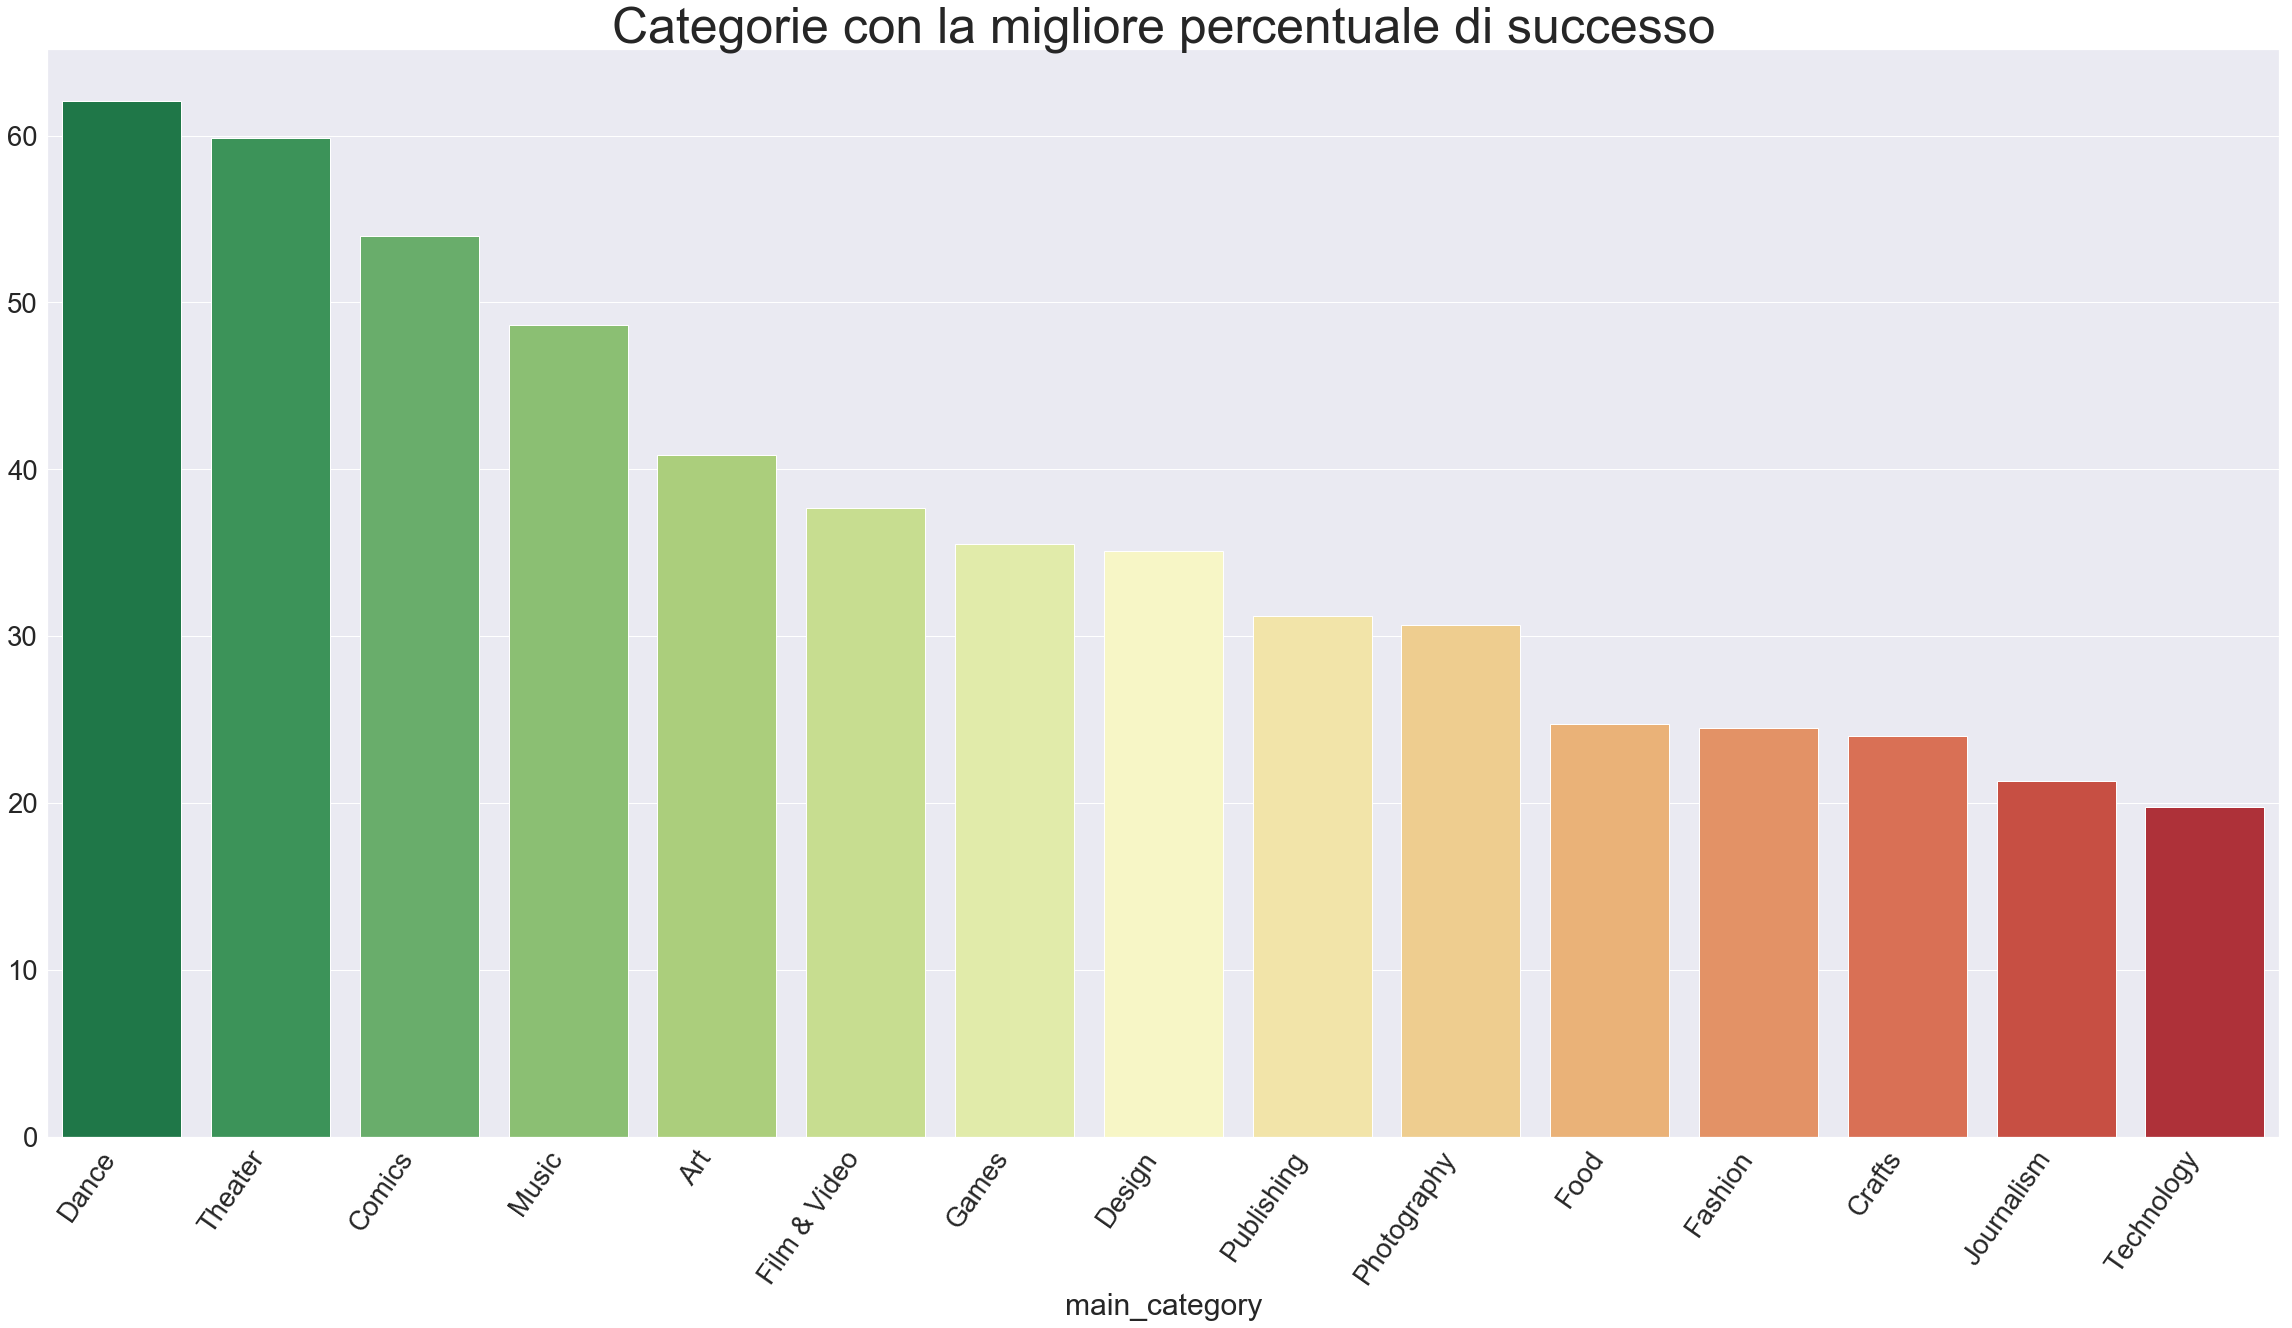

In [17]:
rate_success_cat = data[data['state'] == 'successful'].groupby(['main_category']).count()['name']\
                / data.groupby(['main_category']).count()['name'] * 100

rate_success_mcat = rate_success_cat.sort_values(ascending=False)

create_barplot("Categorie con la migliore percentuale di successo",
               rate_success_mcat.index, rate_success_mcat.values, 
               sns.color_palette("RdYlGn_r", 15), rotate=True)

Qui di seguito sono state calcolate varie medie sulle caratteristiche dei progetti riusciti, le medie sono molto diverse ma si può notare che quasi tutte le medie della durata dei progetti si aggirano intorno ai 30 giorni e la media dei backers da categoria a categoria è molto diversa.

In [18]:
proj_succ = data[data['state'] == "successful"].drop(['pledged','launch_month', 'goal', 'usd pledged'], 1)
groupby_main_category = proj_succ.groupby(['main_category']).mean()
groupby_main_category

,backers,usd_pledged_real,usd_goal_real,launch_year,duration
main_category,,,,,
Art,90.358123,6971.894850,4410.086374,2013.898002,29.340139
Comics,231.404314,11385.660235,5397.352176,2014.642759,30.908593
Crafts,94.148463,5629.696889,3013.430794,2014.863357,28.026950
Dance,63.396065,5194.016121,4601.094769,2013.555603,30.814799
Design,614.842070,62863.392811,15409.212760,2014.861883,32.468101
Fashion,217.001252,20286.555534,9080.955291,2014.715716,30.309136
Film & Video,152.631501,13956.836132,11148.990844,2013.384381,31.310351
Food,180.557929,17349.390516,11633.962945,2014.204601,30.511586
Games,814.384087,54228.755136,14857.224807,2014.913964,28.912846


Anche all'interno di ogni categoria principale cambia a seconda della sottocategoria. Analizziamone due: **Film & Video** e **Games**.

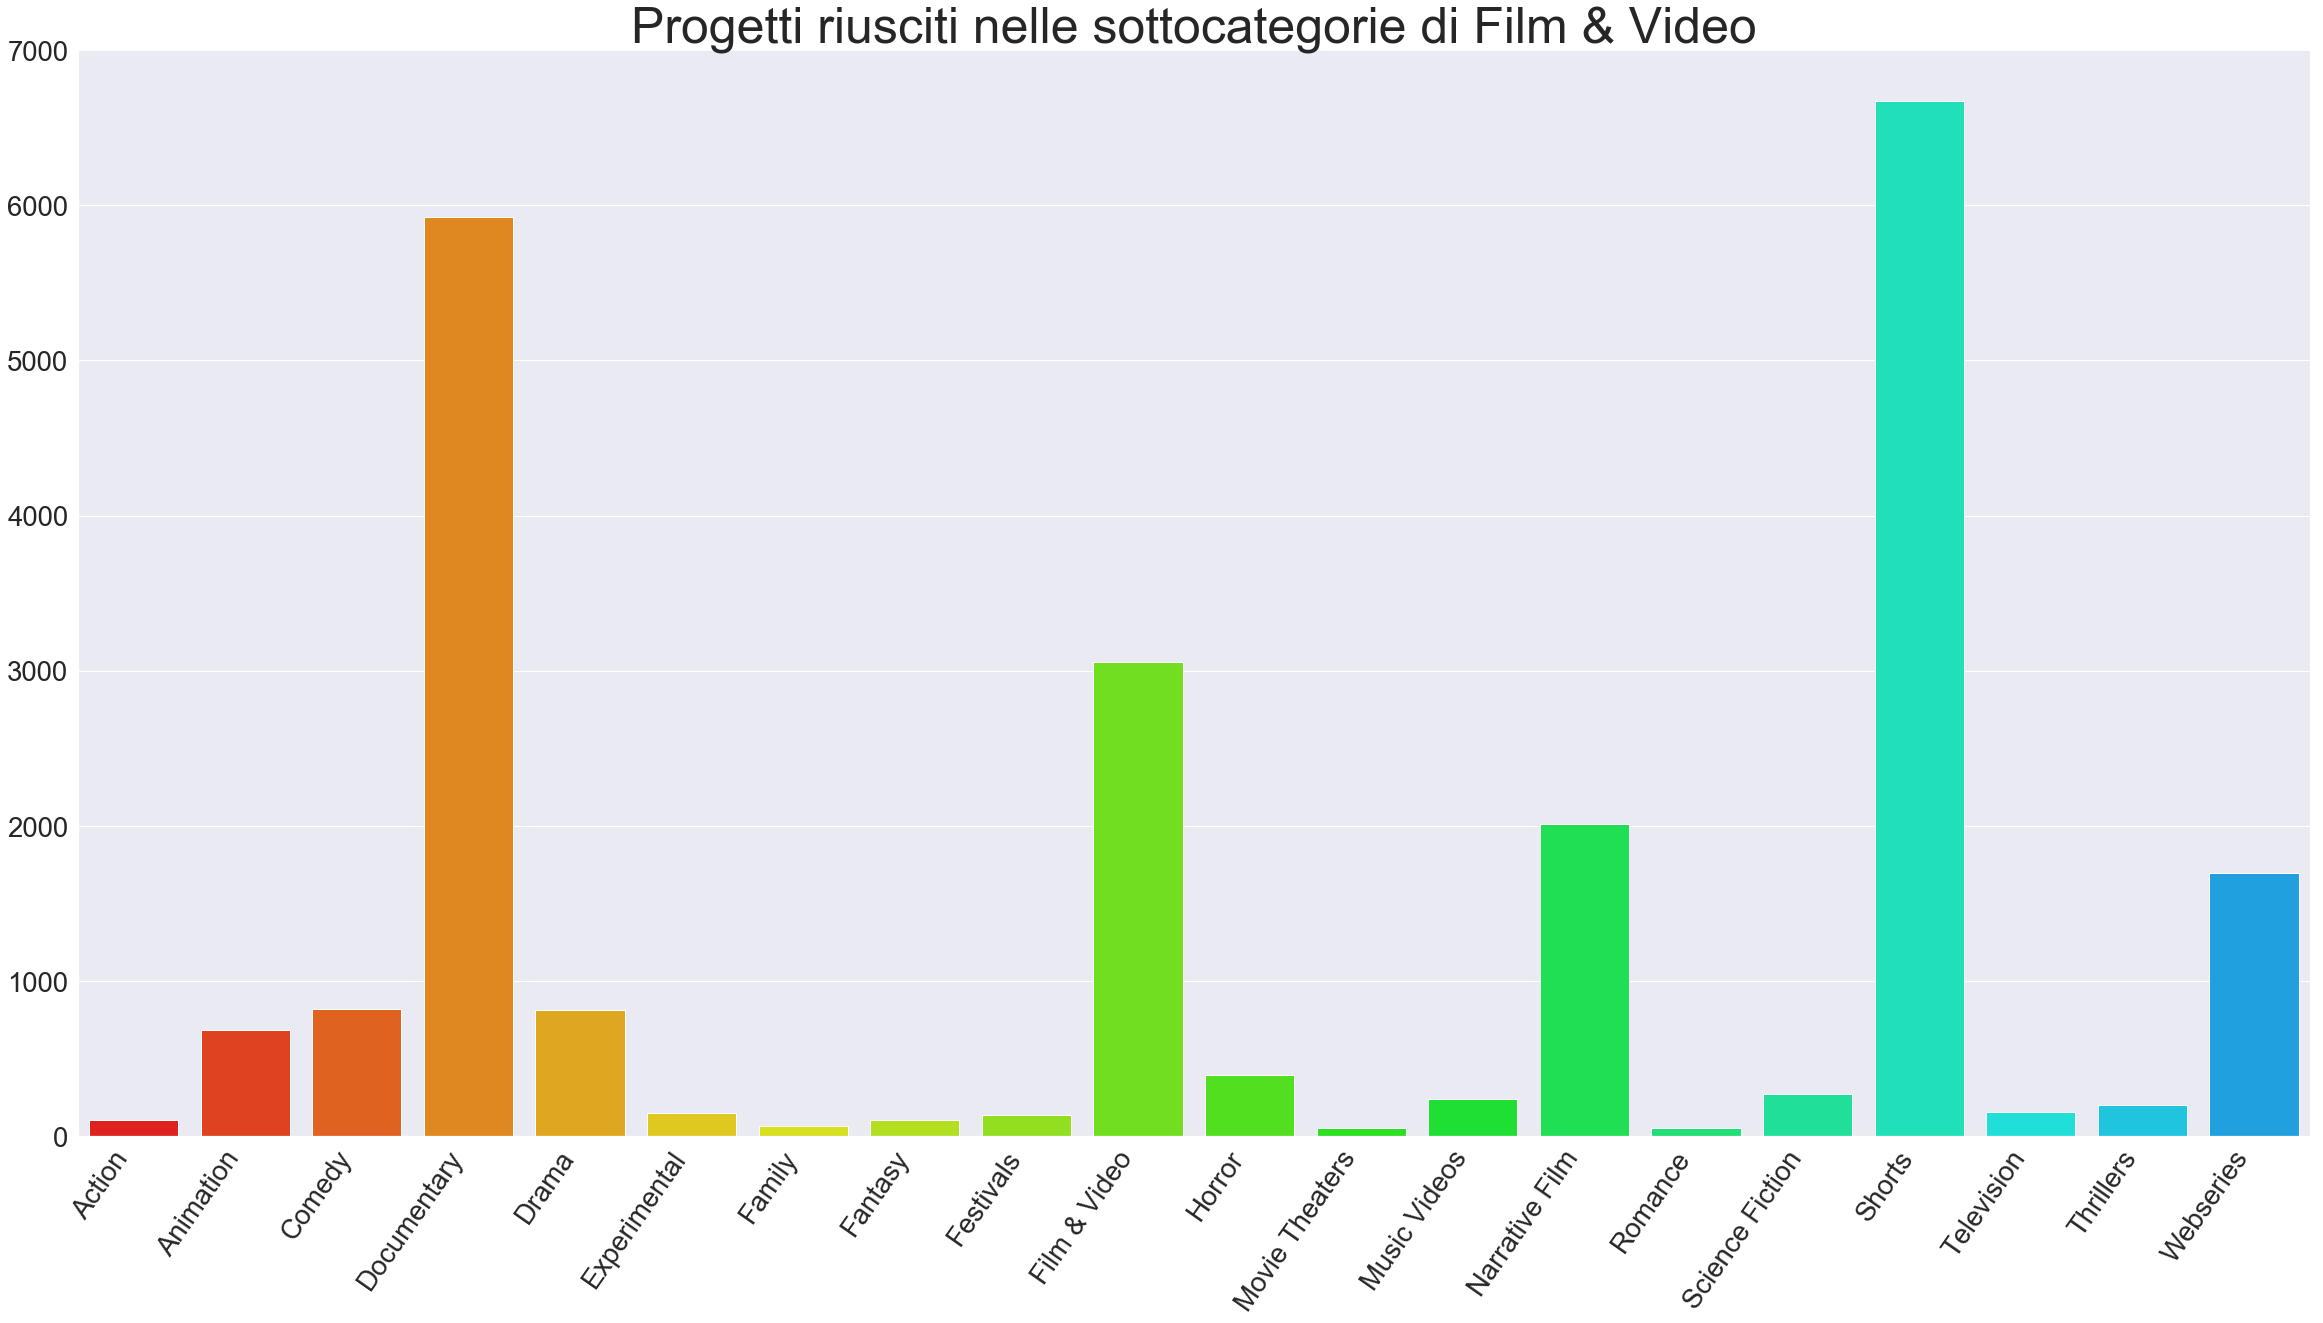

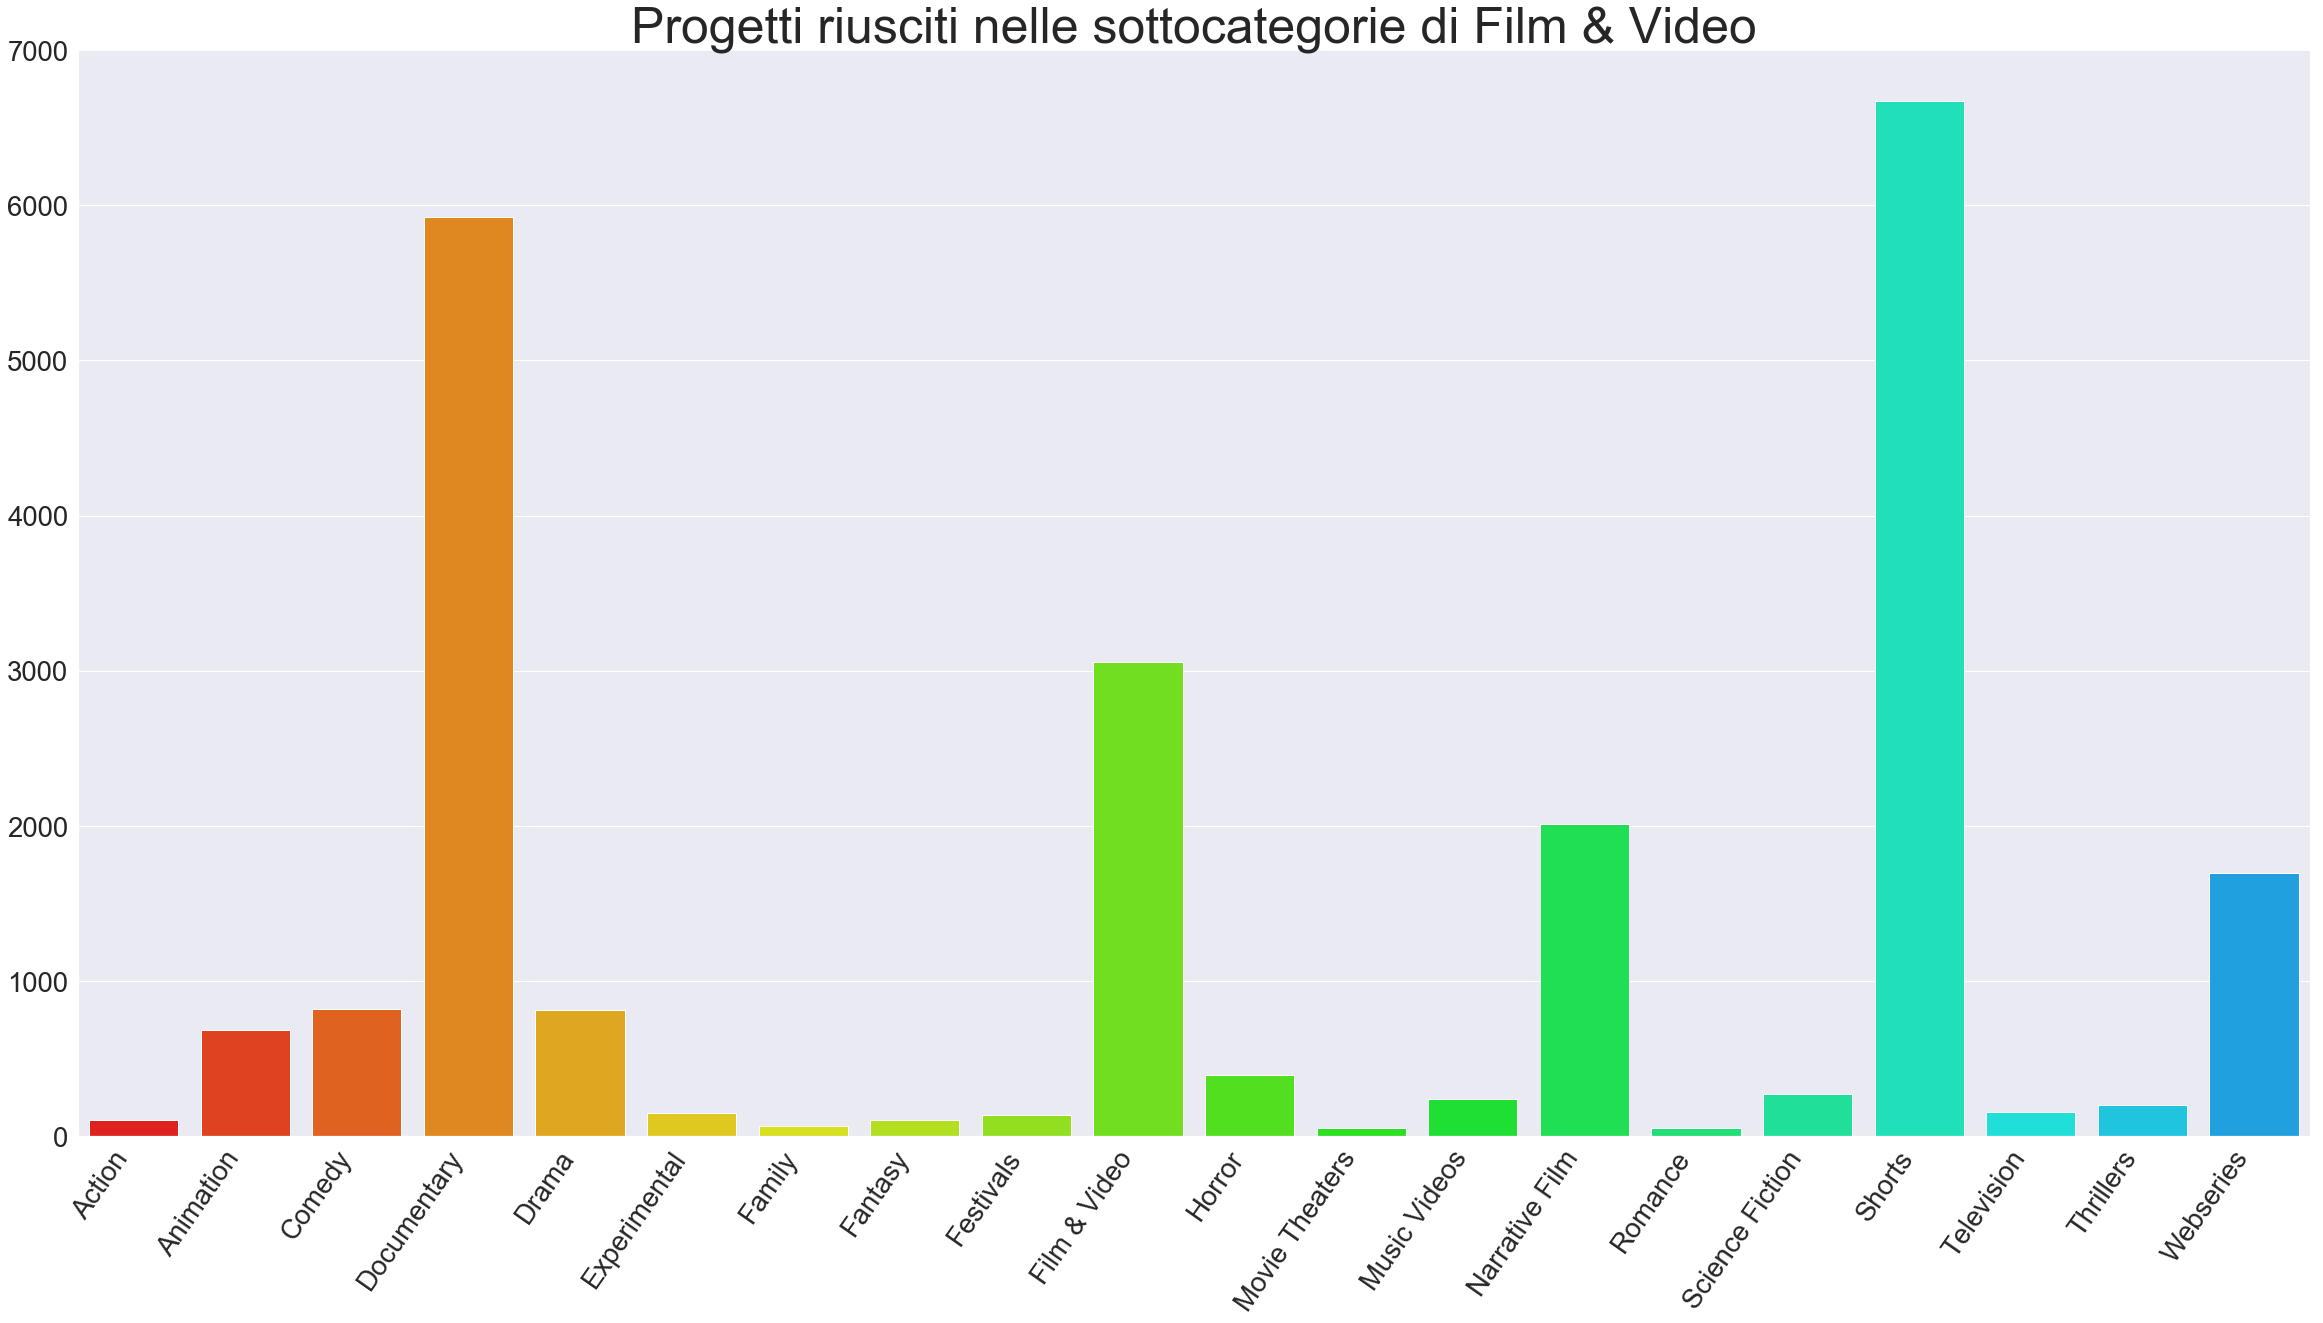

In [19]:
film = proj_succ[proj_succ['main_category']=='Film & Video'].category.value_counts().sort_index()
create_barplot("Progetti riusciti nelle sottocategorie di Film & Video",
       film.index, film.values, 
       sns.color_palette(sns.color_palette("gist_rainbow", 30)), rotate=True)              
n_film = data[data['main_category']=='Film & Video'].category.value_counts().sort_index()
create_barplot("Progetti riusciti nelle sottocategorie di Film & Video",
       film.index, film.values, 
       sns.color_palette(sns.color_palette("gist_rainbow", 30)), rotate=True)     

Giù da questo barplot si può notare quando la sottocategoria influenzi tanto in quanto le sottocategorie *Documentary* e *Shorts* sono quelle che hanno più progetti riusciti.

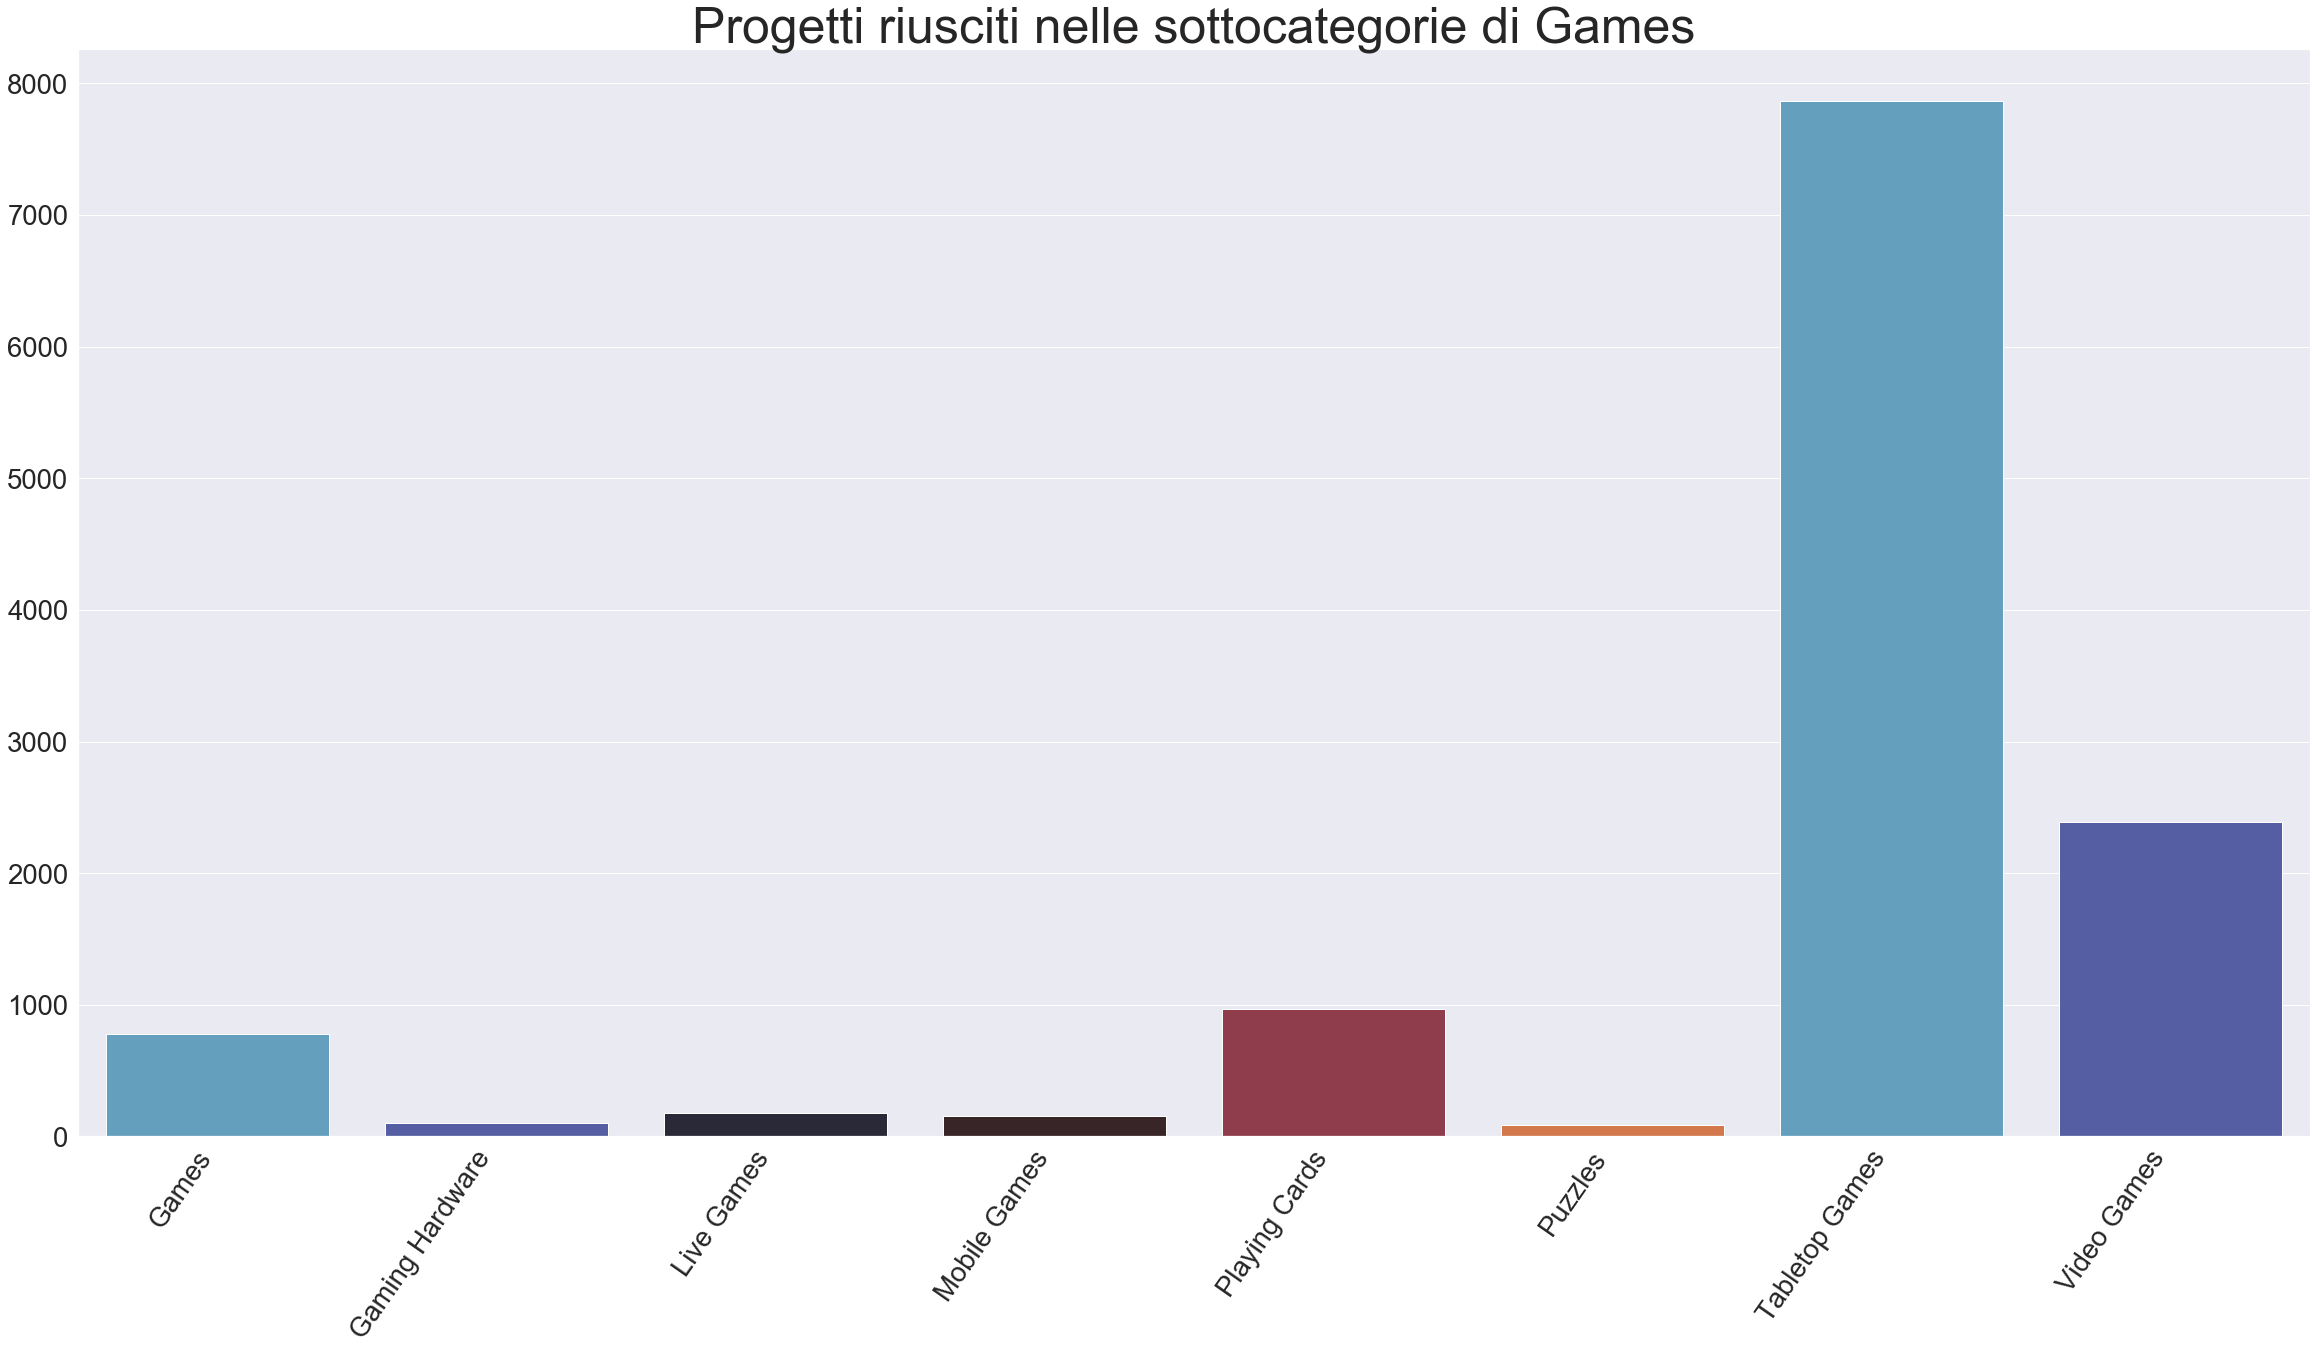

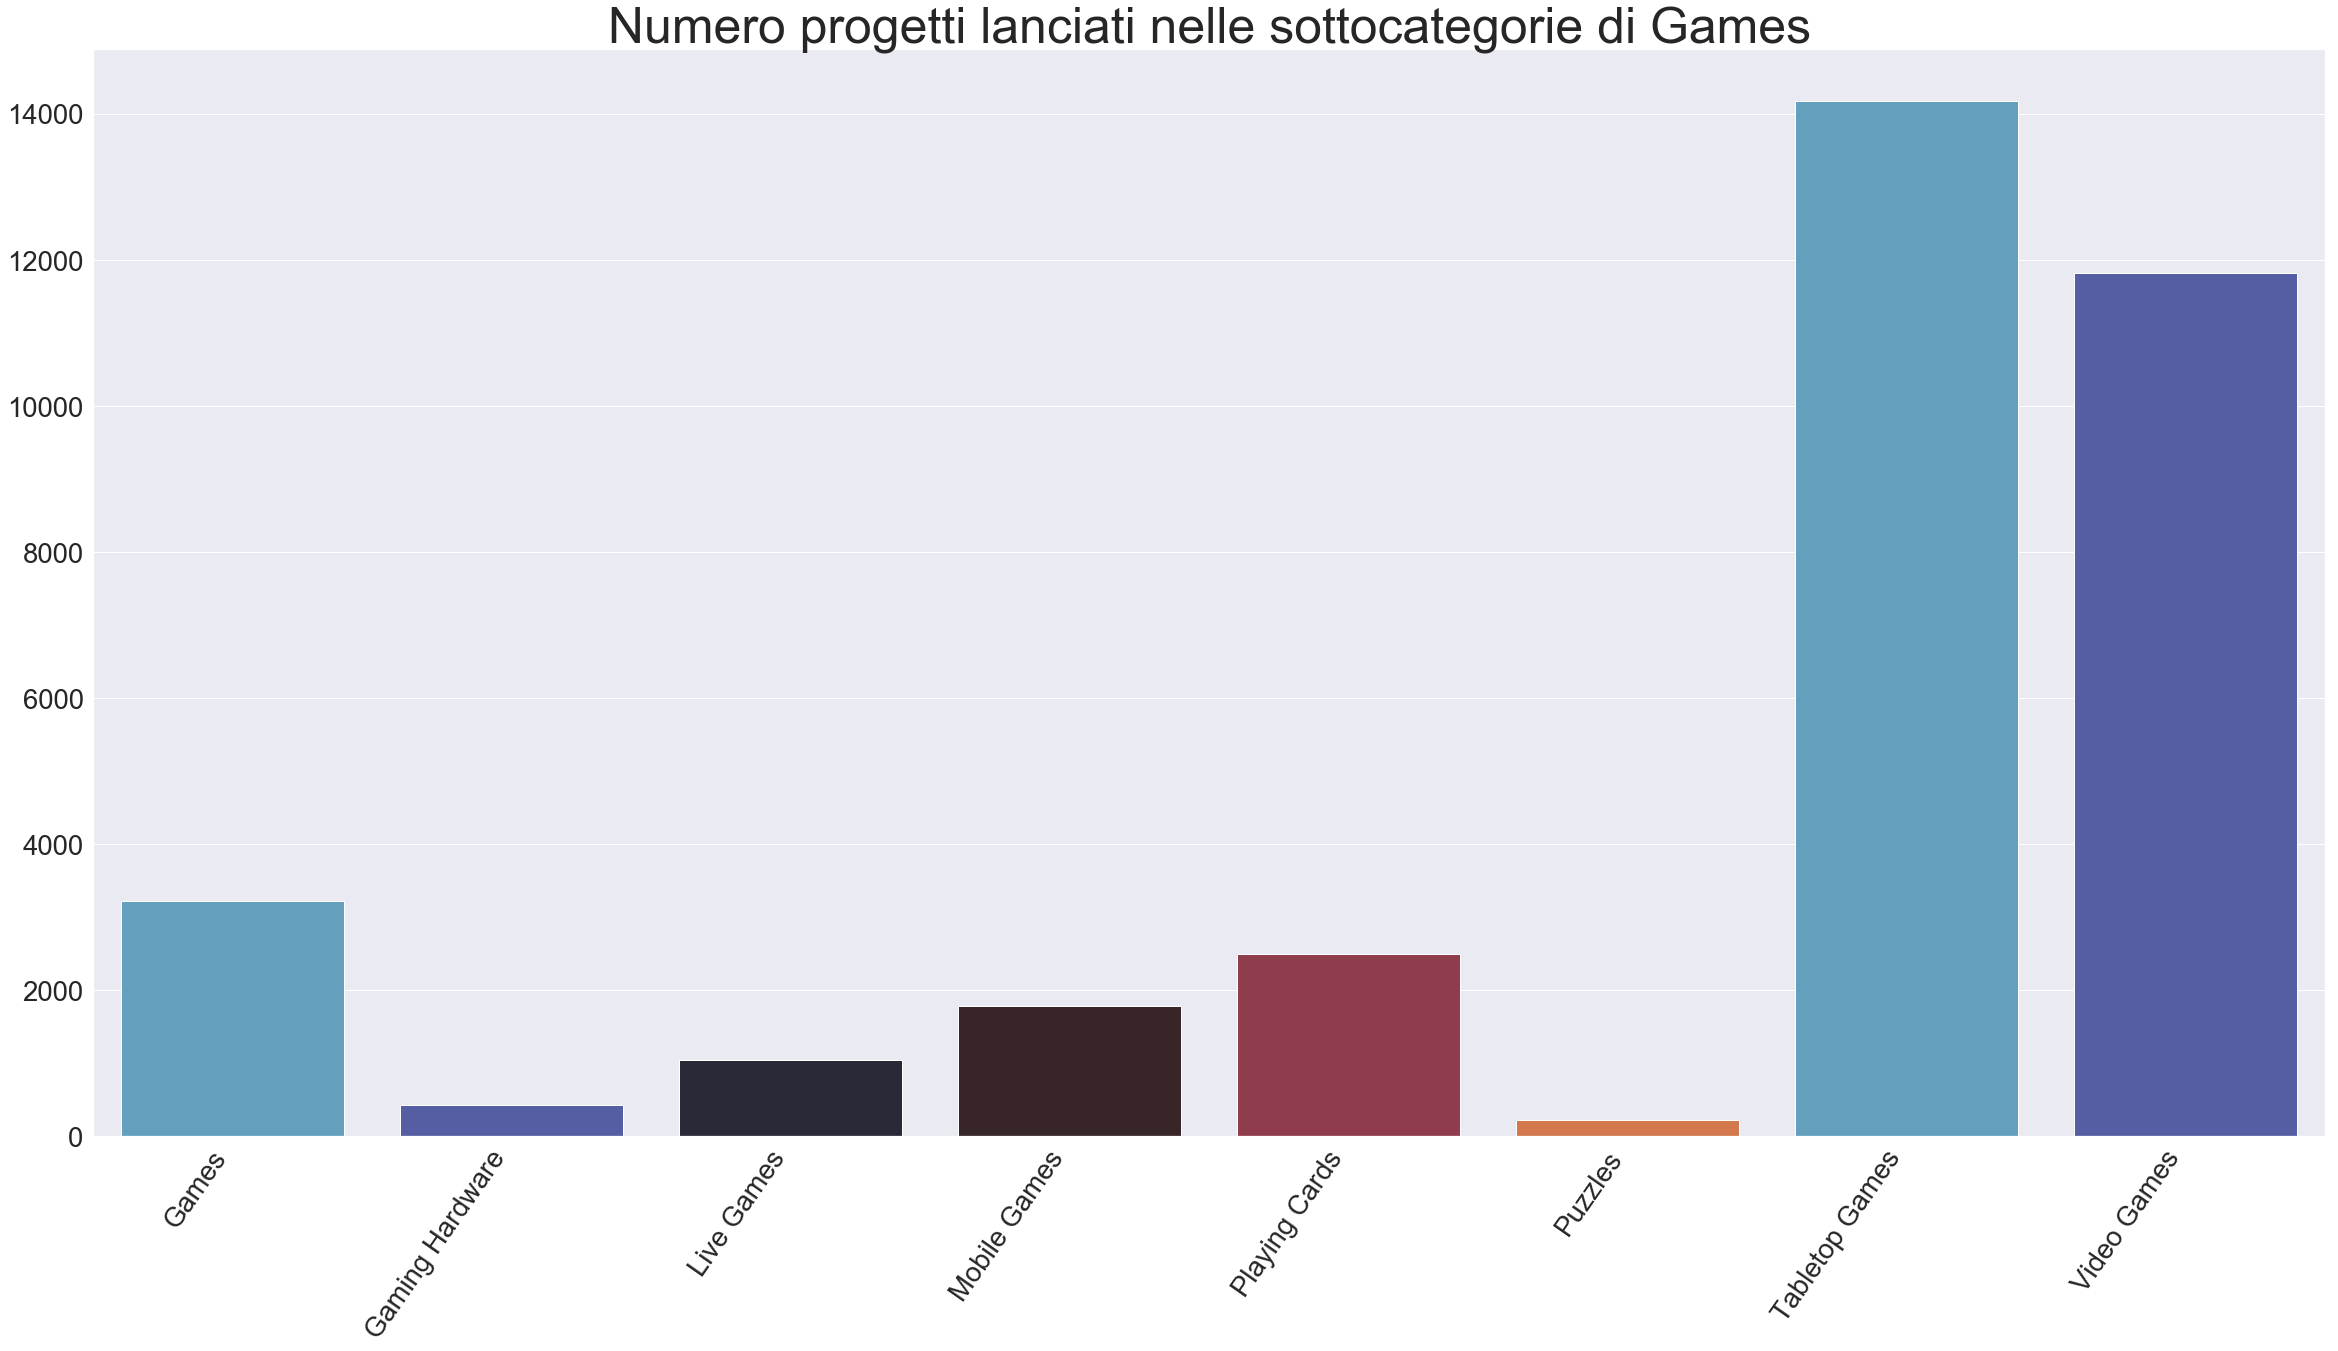

In [20]:
games = proj_succ[proj_succ['main_category']=='Games'].category.value_counts().sort_index()
create_barplot("Progetti riusciti nelle sottocategorie di Games",
       games.index, games.values, 
       sns.color_palette(sns.color_palette("icefire")), rotate=True) 
n_games = data[data['main_category']=='Games'].category.value_counts().sort_index()
create_barplot("Numero progetti lanciati nelle sottocategorie di Games",
       n_games.index, n_games.values, 
       sns.color_palette(sns.color_palette("icefire")), rotate=True) 

La tendenza di avere una sottocategoria più "di successo" rispetto alle altre è ancora più evidente nella categoria *Games* dove la sottocategoria *Tabletop* è decisamente quella più di successo nonostante anche nella sottocategoria *Video Games* ci siano molti progetti lanciati. Precedentemente si è visto che in generale la percentuale dei progetti di successo è il 35%, visualizzando la percentuale negli anni notiamo che nei primi anni la percentuale è più alta, questo probabilmente perché il numero di progetti era minore. 

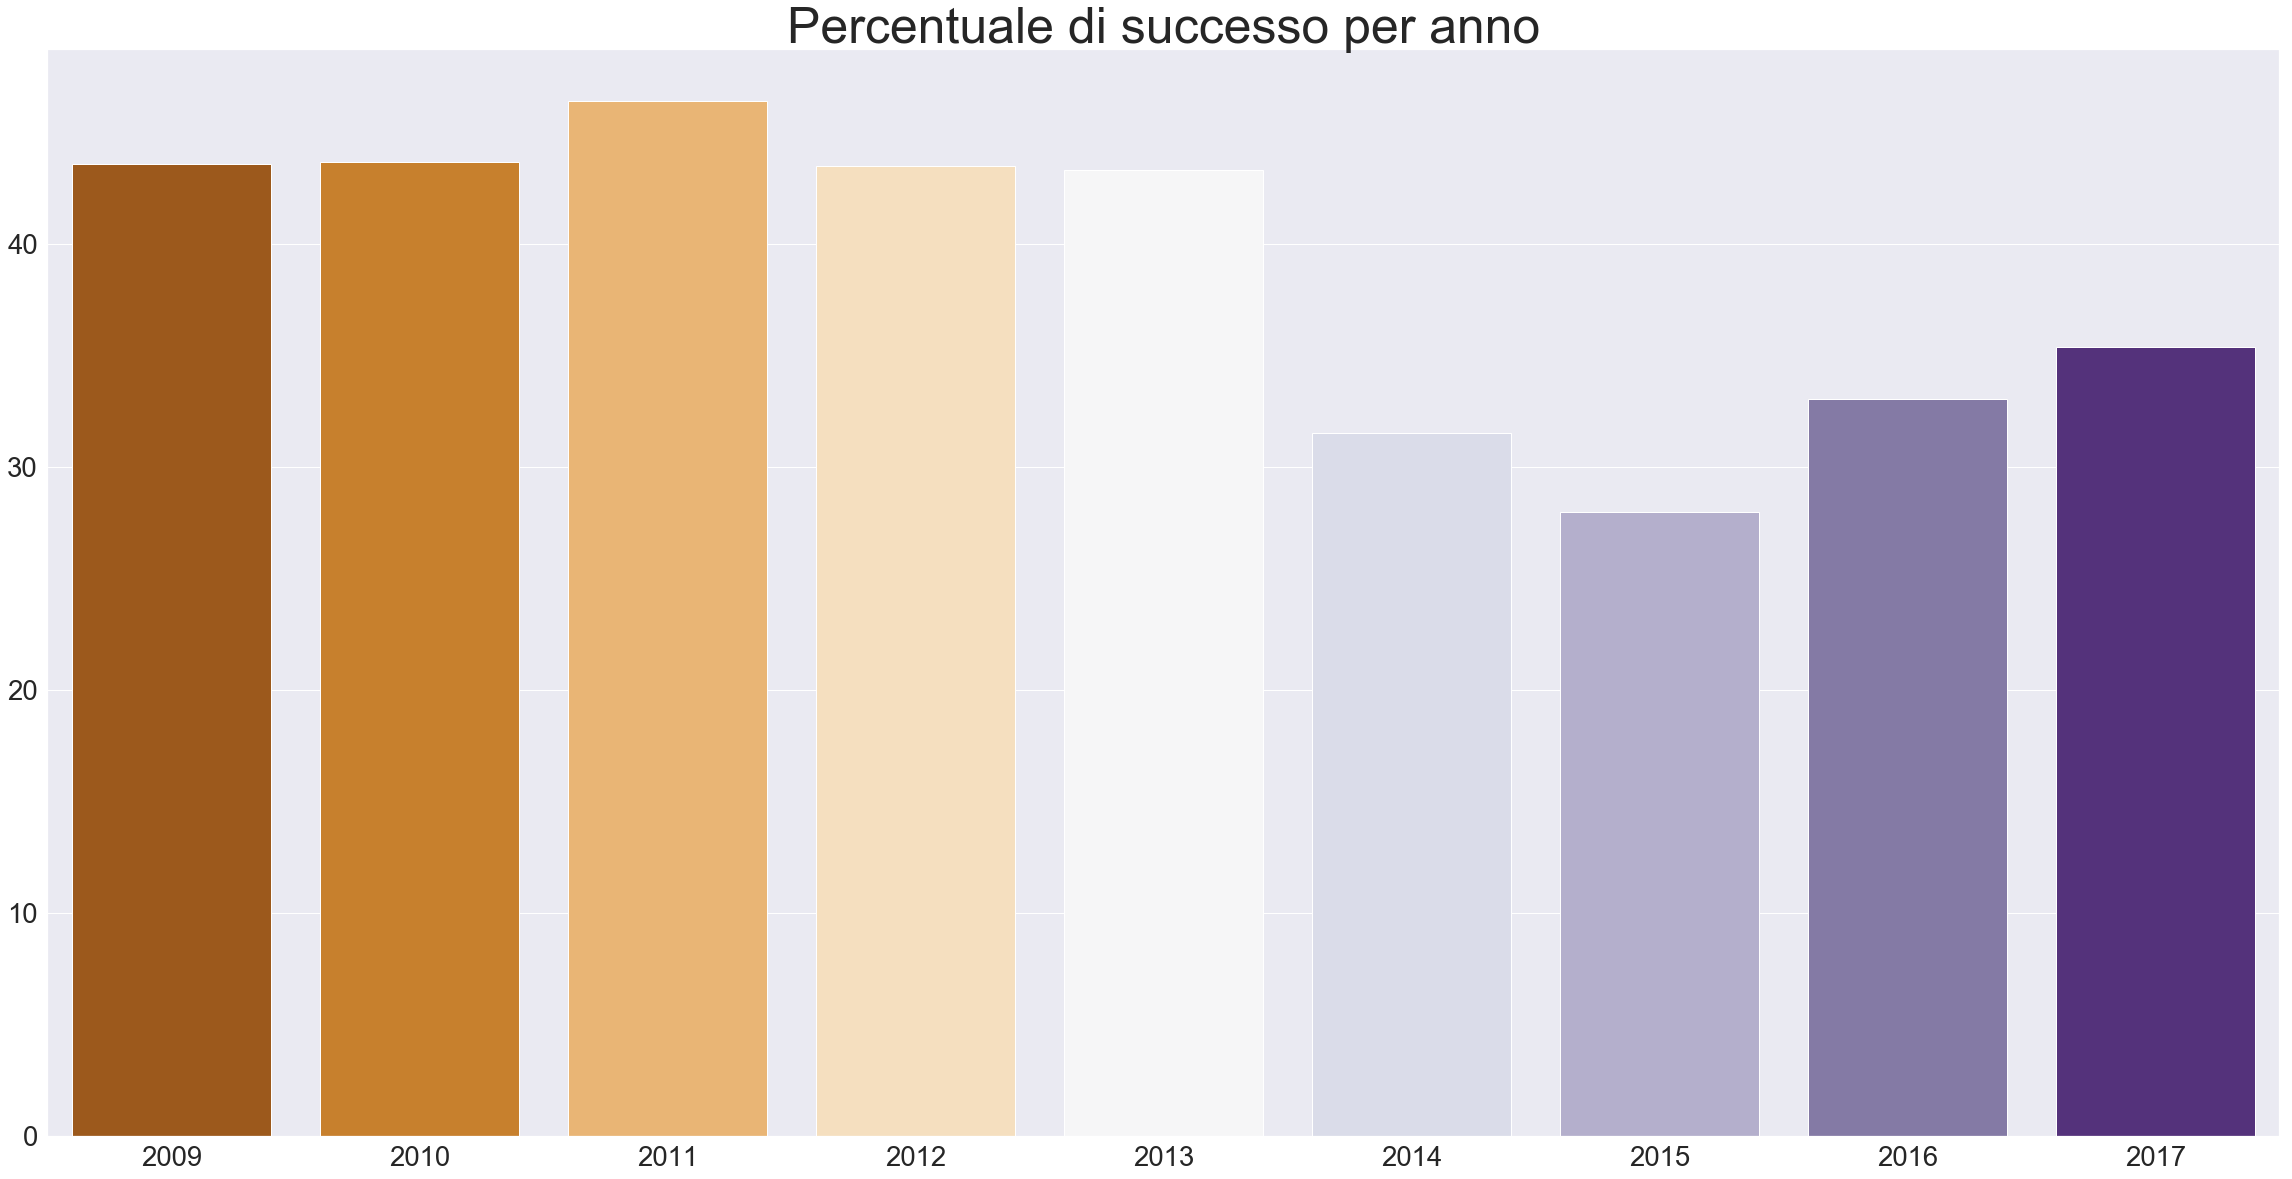

In [21]:
rate_succ_year = proj_succ.launch_year.value_counts().sort_index() /data.launch_year.value_counts().sort_index() *100
rate_succ_year = rate_succ_year.drop([1970,2018], axis=0)
create_barplot("Percentuale di successo per anno",
       rate_succ_year.index, rate_succ_year.values, 
       sns.color_palette(sns.color_palette("PuOr", 9)), rotate=False) 

*****

<center><font size=20><b> <font color='#87c442'>R</font>egressione </font> <font size=20><b> <font color='#87c442'>L</font>ineare </font></center>

## Preprocessing

Adesso si proverà a calcolare una regressione lineare avendo come variabile dipendente *usd_pledged_real* e come variabili indipendenti: category, main_category, state, backers, usd_goal_real, launch_year, launch_month, duration. Prima di calcolare la regressione viene effettuata una fase di preprocessing. Vengono tenuti solo i progetti riusciti e falliti per semplicità e vengono rimosse tutte le colonne che non vengono usate.

In [22]:
data_regr = data[(data['state'] == 'failed') | (data['state'] == 'successful')].copy()
data_regr = data_regr.drop('name',1)
data_regr = data_regr.drop('usd pledged', 1)
data_regr = data_regr.drop('pledged', 1)
data_regr = data_regr.drop('currency', 1)
data_regr = data_regr.drop('goal', 1)
data_regr = data_regr.drop('country', 1)
print(data_regr.shape)
data_regr.head()

(331462, 9)


,category,main_category,state,backers,usd_pledged_real,usd_goal_real,launch_year,launch_month,duration
0,Poetry,Publishing,failed,0,0.0,1533.95,2015,8,58
1,Narrative Film,Film & Video,failed,15,2421.0,30000.00,2017,9,59
2,Narrative Film,Film & Video,failed,3,220.0,45000.00,2013,1,44
3,Music,Music,failed,1,1.0,5000.00,2012,3,29
5,Restaurants,Food,successful,224,52375.0,50000.00,2016,2,34


Adesso vengono sostituiti i valori della colonna state (failed, successful) con due valori numerici, rispettivamente 0 ed 1.

In [23]:
data_regr['state'] = data_regr['state'].replace({'successful':1,'failed':0})
data_regr.head()

,category,main_category,state,backers,usd_pledged_real,usd_goal_real,launch_year,launch_month,duration
0,Poetry,Publishing,0,0,0.0,1533.95,2015,8,58
1,Narrative Film,Film & Video,0,15,2421.0,30000.00,2017,9,59
2,Narrative Film,Film & Video,0,3,220.0,45000.00,2013,1,44
3,Music,Music,0,1,1.0,5000.00,2012,3,29
5,Restaurants,Food,1,224,52375.0,50000.00,2016,2,34


Adesso bisogna convertire le variabili categoriche (category, main_category) in variabili dummy binarie.

In [24]:
data_regr = pd.get_dummies(data_regr,columns=['category'])
data_regr = pd.get_dummies(data_regr, columns=['main_category'])
data_regr.rename(columns={"main_category_Film & Video": "main_category_Film"}, inplace=True)
data_regr.head()

,state,backers,usd_pledged_real,usd_goal_real,launch_year,launch_month,duration,category_3D Printing,category_Academic,category_Accessories,...,main_category_Fashion,main_category_Film,main_category_Food,main_category_Games,main_category_Journalism,main_category_Music,main_category_Photography,main_category_Publishing,main_category_Technology,main_category_Theater
0,0,0,0.0,1533.95,2015,8,58,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,15,2421.0,30000.00,2017,9,59,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,3,220.0,45000.00,2013,1,44,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1,1.0,5000.00,2012,3,29,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,1,224,52375.0,50000.00,2016,2,34,0,0,0,...,0,0,1,0,0,0,0,0,0,0


Infine bisogna costruire una stringa da passare al metodo per la regressione lineare.

In [25]:
data_regr.columns = data_regr.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('\'','').str.replace('-','_').str.replace('&','_')

In [26]:
features = list(data_regr.columns.values)
regr_str = "usd_pledged_real ~"
for f in features:
    if f != "usd_pledged_real":
        regr_str = regr_str + " " + f + " +"
regr_str = regr_str[0:-1]

## Analisi Regressione

Finalmente si può calcolare la regressione sui dati. Verrà usato il metodo dei minimi quadrati (Ordinary Least Squares - OLS),
implementato dalla libreria statsmodels

In [27]:
from statsmodels.formula.api import ols
model = ols(regr_str,data_regr).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       usd_pledged_real   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     2566.
Date:                Sat, 28 Mar 2020   Prob (F-statistic):               0.00
Time:                        17:07:19   Log-Likelihood:            -4.1348e+06
No. Observations:              331462   AIC:                         8.270e+06
Df Residuals:                  331289   BIC:                         8.272e+06
Df Model:                         172                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                   -9.282e+05   1.25e+05     -7.423      0.000   -1.17e+06   -6.83e+05
state                        3309.9094    239.455     13.823      0.000    2840.584    3779.235
backers                        74.9951      0.116    647.812      0.000      74.768      75.222
usd_goal_real                   0.0002   9.93e-05      1.797      0.072   -1.62e-05       0.000
launch_year                   493.5200     66.566      7.414      0.000     363.052     623.988
launch_month                   63.0395     33.584      1.877      0.061      -2.785     128.864
duration                       80.9359      8.920      9.074      0.000      63.453      98.419
category_3d_printing         3.622e+04   2787.680     12.993      0.000    3.08e+04    4.17e+04
category_academic           -6887.6538   6295.486     -1.094      0.274   -1.92e+04    5451.317
category_accessories        -8385.3767   1693.536     -4.951      0.000   -1.17e+04   -5066.096
category_action             -1.046e+04   6061.264     -1.726      0.084   -2.23e+04    1416.371
category_animals            -9170.2053   3891.233     -2.357      0.018   -1.68e+04   -1543.501
category_animation          -1.025e+04   5659.648     -1.810      0.070   -2.13e+04     846.505
category_anthologies         -1.45e+04   6123.381     -2.369      0.018   -2.65e+04   -2503.261
category_apparel            -6548.6498   1478.042     -4.431      0.000   -9445.569   -3651.730
category_apps                -1.94e+04   1434.187    -13.524      0.000   -2.22e+04   -1.66e+04
category_architecture       -8246.2309   2697.811     -3.057      0.002   -1.35e+04   -2958.599
category_art                -5017.4324   1134.970     -4.421      0.000   -7241.941   -2792.924
category_art_books          -7424.3367   6005.308     -1.236      0.216   -1.92e+04    4345.894
category_audio              -2.088e+04   3704.294     -5.636      0.000   -2.81e+04   -1.36e+04
category_bacon              -7361.3958   7648.075     -0.963      0.336   -2.24e+04    7628.610
category_blues                827.7627   1.39e+04      0.059      0.953   -2.64e+04    2.81e+04
category_calendars          -9851.7002   6936.538     -1.420      0.156   -2.34e+04    3743.714
category_camera_equipment    3.661e+04   3436.496     10.652      0.000    2.99e+04    4.33e+04
category_candles              651.0379   1.99e+04      0.033      0.974   -3.84e+04    3.97e+04
category_ceramics           -4615.5811   3663.309     -1.260      0.208   -1.18e+04    2564.398
category_childrens_books    -7561.2580   5925.782     -1.276      0.202   -1.92e+04    4053.104
category_childrenswear      -7722.4018   3050.949     -2.531      0.011   -1.37e+04   -1742.630
category_chiptune           -1.704e+04   1.72e+04     -0.991      0.322   -5.07e+04    1.67e+04
category_ci

Il valore di $R^2$ non è alto ma comunque ci dice che il modello lineare riesce comunque a
fornire un valore aggiunto rispetto a utilizzare il valore medio. Possiamo verificare questo calcolando l'errore standard ($MSE$) utilizzando il valore medio:

In [28]:
# Varianza
print("MSE (valore medio):", np.sqrt(((data_regr['usd_pledged_real']-data_regr['usd_pledged_real'].mean())**2).mean()))

MSE (valore medio): 96645.46116935836


E utilizzando il modello lineare:

In [29]:
# Usando il modello
print("MSE (modello lineare):", np.sqrt(((data_regr['usd_pledged_real']-model.predict(data_regr))**2).mean()))

MSE (modello lineare): 63283.2215846022


L'errore del modello lineare è molto grande ma è comunque minore di quello risultante usando il valore medio. Il valore di F-Static è alto e quello di prob (F-Static) è nullo quindi il regressore è significativo. Tutti i p-value delle prime feature sono prossimi a zero e quindi contribuiscono significativamente alla regressione, i p-value maggiori di $0.05$ sono di alcune categorie ma togliendo queste feature non si hanno miglioramenti nella regressione

<center><font size=20><b> <font color='#87c442'>C</font>lassificatore </font> <font size=20><b></font></center>

Verrà utilizzato un classificatore Naive Bayes per cercare di predire se un progetto avrà successo o meno.

## Preprocessing

Vengono mantenuti solo i record che hanno come stato "failed" e "successful", successivamente vengono convertite le stringhe in 1 o 0. 

In [30]:
from sklearn.model_selection import train_test_split
data_c = data[(data['state'] == 'failed') | (data['state'] == 'successful')].copy()
data_c['state'] = data_c['state'].replace({'successful':1,'failed':0})

Successivamente vengono rimosse le feature non utili per la classificazione.

In [31]:
data_c = data_c.drop(['name', 'pledged', 'backers', 'country',
       'usd pledged', 'usd_pledged_real'], 1)

L'ultimo passo del preprocessing è quello di creare le variabili dummy, così da non avere più stringhe nel dataset.

In [32]:
data_c = pd.get_dummies(data_c, columns = ['main_category'])
data_c = pd.get_dummies(data_c, columns = ['category'])
data_c = pd.get_dummies(data_c, columns = ['currency'])

Il dataset così processato avrà il seguente aspetto:



In [33]:
data_c.head()

,goal,state,usd_goal_real,launch_year,launch_month,duration,main_category_Art,main_category_Comics,main_category_Crafts,main_category_Dance,...,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD
0,1000.0,0,1533.95,2015,8,58,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,30000.0,0,30000.00,2017,9,59,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,45000.0,0,45000.00,2013,1,44,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,5000.0,0,5000.00,2012,3,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,50000.0,1,50000.00,2016,2,34,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [34]:
feature = data_c.drop('state', 1)
label = data_c['state']
X_train, X_test, Y_train, Y_test = train_test_split(
    feature,
    label, 
    test_size = 0.25,
    random_state=1234
)

In [35]:
feature.head()

,goal,usd_goal_real,launch_year,launch_month,duration,main_category_Art,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,...,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD
0,1000.0,1533.95,2015,8,58,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,30000.0,30000.00,2017,9,59,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,45000.0,45000.00,2013,1,44,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,5000.0,5000.00,2012,3,29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,50000.0,50000.00,2016,2,34,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [36]:
data_c.head()

,goal,state,usd_goal_real,launch_year,launch_month,duration,main_category_Art,main_category_Comics,main_category_Crafts,main_category_Dance,...,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD
0,1000.0,0,1533.95,2015,8,58,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,30000.0,0,30000.00,2017,9,59,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,45000.0,0,45000.00,2013,1,44,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,5000.0,0,5000.00,2012,3,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,50000.0,1,50000.00,2016,2,34,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [37]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(248596, 193) (248596,)
(82866, 193) (82866,)


In [38]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB(priors=[0.5,0.5])
#effettuiamo il fit del modello mediante il metodo fit
model.fit(X_train,Y_train)

GaussianNB(priors=[0.5, 0.5], var_smoothing=1e-09)

In [39]:
model.score(X_test, Y_test)

0.4346052663335988

In [40]:
from sklearn.neighbors import KNeighborsClassifier as KNN
knn_1 = KNN(n_neighbors=1)

In [41]:
knn_1.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [42]:
knn_1.score(X_test, Y_test)

0.5914126420968793

In [43]:
knn_1.score(X_train, Y_train)

0.9586598336256416

In questa analisi di data si è provato a stimare i soldi raccolti in un progetto kickstarter tramite regressione lineare e si è provato a predire il successo o il fallimento di un dato progetto tramite vari classificatori